#### When simulating censoring_builder_relay_ratio and censoring_validator_relay_ratio_non_censoring, the average number of connected nodes was adjusted to 8 in this set of experiments in order to increase the variety of scenarios, as the number of connections must be an integer.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import ast
import itertools
import seaborn as sns
import os
import glob
import pandas as pd
import os
import re
from matplotlib.ticker import ScalarFormatter

#### Transaction Delay - censoring_builder_relay_ratio

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_censoring_br_vr_ratios_20250620_113554"


combined_transactions = pd.DataFrame()


folders = [
    f for f in os.listdir(base_dir) 
    if re.match(r"censoring_br_vr_ratios_\d+\.\d+_0\.250_", f)
]


def extract_br_ratio(folder_name):
    match = re.search(r"censoring_br_vr_ratios_(\d+\.\d+)_0\.250_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_br_ratio)


for folder in folders:
    br_ratio = extract_br_ratio(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "transactions.csv")

    transactions = pd.read_csv(file_path, low_memory=False)
    transactions = transactions[transactions['is_proposed']].copy()


    if transactions.empty:
        print(f"Warning: No proposed transactions found in folder {folder}")
        continue

    transactions['proposal_delay'] = transactions['proposed_time'] - transactions['arrival_time']
    transactions['sanctioned_type'] = transactions['sanctioned_type'].map({0: 'Non-sanctioned (0)', 1: 'Sanctioned (1)'})
    transactions['experiment'] = f"cbrr_{br_ratio:.3f}"

    combined_transactions = pd.concat([combined_transactions, transactions], ignore_index=True)


if combined_transactions.empty:
    print("No transactions data available after filtering.")
else:

    negative_delay_txs = combined_transactions[combined_transactions['proposal_delay'] < 0]
    print("Transactions with negative proposal delay:")
    print(negative_delay_txs if not negative_delay_txs.empty else "None found")


run_stats = combined_transactions.groupby(['experiment', 'run_id', 'sanctioned_type'])['proposal_delay'].agg(['mean', 'std']).reset_index()
final_stats = run_stats.groupby(['experiment', 'sanctioned_type']).agg({
    'mean': 'mean',
    'std': 'mean'
}).reset_index()

print("\nProposal Delay Statistics by Experiment and Sanctioned Type (averaged by run_id):")
print(final_stats)


Transactions with negative proposal delay:
None found

Proposal Delay Statistics by Experiment and Sanctioned Type (averaged by run_id):
   experiment     sanctioned_type       mean        std
0  cbrr_0.500  Non-sanctioned (0)  17.412598  16.601380
1  cbrr_0.500      Sanctioned (1)  30.032944  62.858412
2  cbrr_0.625  Non-sanctioned (0)  17.595826  18.230505
3  cbrr_0.625      Sanctioned (1)  30.484939  65.183686
4  cbrr_0.750  Non-sanctioned (0)  18.828584  28.265496
5  cbrr_0.750      Sanctioned (1)  32.608681  73.826906
6  cbrr_0.875  Non-sanctioned (0)  18.955901  28.708571
7  cbrr_0.875      Sanctioned (1)  31.822854  73.109548
8  cbrr_1.000  Non-sanctioned (0)  19.049355  29.406793
9  cbrr_1.000      Sanctioned (1)  30.585054  72.360813


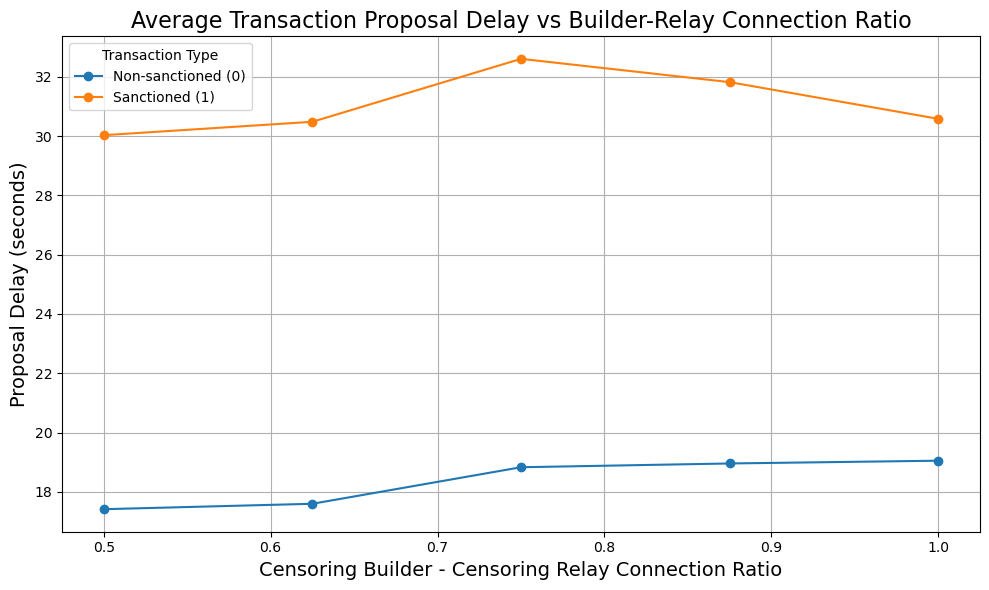

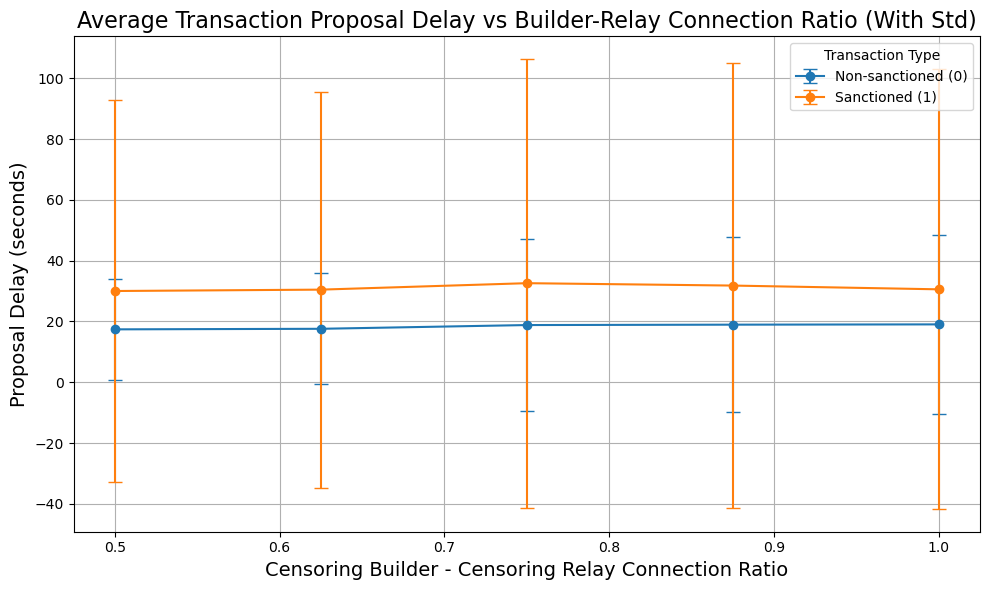

In [ ]:

final_stats['censoring_builder_relay_ratio'] = final_stats['experiment'].str.extract(r'cbrr_(\d+\.\d+)').astype(float)


fig, ax = plt.subplots(figsize=(10, 6))
for label, group in final_stats.groupby('sanctioned_type'):
    ax.plot(group['censoring_builder_relay_ratio'], group['mean'], '-o', label=label)

ax.set_xlabel('Censoring Builder - Censoring Relay Connection Ratio', fontsize=14)
ax.set_ylabel('Proposal Delay (seconds)', fontsize=14)
ax.set_title('Average Transaction Proposal Delay vs Builder-Relay Connection Ratio', fontsize=16)
ax.legend(title='Transaction Type')
ax.grid(True)
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(10, 6))
for label, group in final_stats.groupby('sanctioned_type'):
    ax.errorbar(group['censoring_builder_relay_ratio'], group['mean'], yerr=group['std'],
                fmt='-o', label=label, capsize=5)

ax.set_xlabel('Censoring Builder - Censoring Relay Connection Ratio', fontsize=14)
ax.set_ylabel('Proposal Delay (seconds)', fontsize=14)
ax.set_title('Average Transaction Proposal Delay vs Builder-Relay Connection Ratio (With Std)', fontsize=16)
ax.legend(title='Transaction Type')
ax.grid(True)
plt.tight_layout()
plt.show()


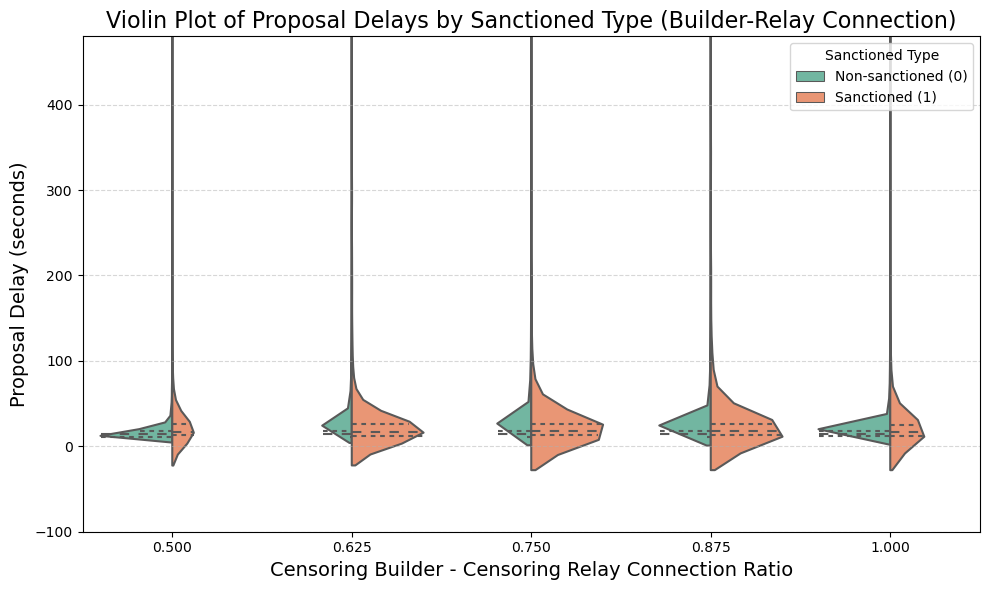

In [ ]:


plt.figure(figsize=(10, 6))

sns.violinplot(
    data=combined_transactions,
    x='experiment',
    y='proposal_delay',
    hue='sanctioned_type',
    split=True,
    inner='quartile',
    palette='Set2',
    clip=(0, 480),
)


current_labels = plt.gca().get_xticklabels()
new_labels = [f"{float(label.get_text()[-5:]):.3f}" for label in current_labels]
plt.gca().set_xticklabels(new_labels)

plt.ylim(-100, 480)
plt.xlabel('Censoring Builder - Censoring Relay Connection Ratio', fontsize=14)
plt.ylabel('Proposal Delay (seconds)', fontsize=14)
plt.title('Violin Plot of Proposal Delays by Sanctioned Type (Builder-Relay Connection)', fontsize=16)

plt.legend(title='Sanctioned Type', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### The number/proportion of blocks containing sanctioned transactions
#### The number/proportion of empty blocks
#### -  censoring_builder_relay_ratio

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_censoring_br_vr_ratios_20250620_113554"


folders = [
    f for f in os.listdir(base_dir) 
    if re.match(r"censoring_br_vr_ratios_\d+\.\d+_0\.250_", f)
]


def extract_br_ratio(folder_name):
    match = re.search(r"censoring_br_vr_ratios_(\d+\.\d+)_0\.250_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_br_ratio)


results = []

for folder in folders:
    br_ratio = extract_br_ratio(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)

    run_ids = blocks['run_id'].unique()


    run_metrics = []

    for run in run_ids:
        run_blocks = blocks[blocks['run_id'] == run]

        non_empty_blocks = run_blocks[(run_blocks['is_proposed']) & (run_blocks['builder_id'] != 'PROPOSER')].copy()
        non_empty_blocks['contains_sanctioned'] = non_empty_blocks['num_sanctioned_tx'] > 0

        blocks_with_sanctioned = non_empty_blocks['contains_sanctioned'].sum()
        blocks_without_sanctioned = (~non_empty_blocks['contains_sanctioned']).sum()
        total_non_empty_blocks = len(non_empty_blocks)

        empty_blocks = run_blocks[(run_blocks['is_proposed']) & (run_blocks['builder_id'] == 'PROPOSER')]
        total_empty_blocks = empty_blocks.shape[0]
        total_proposed_blocks = total_non_empty_blocks + total_empty_blocks

   
        ratio_with_sanctioned = blocks_with_sanctioned / total_non_empty_blocks if total_non_empty_blocks > 0 else 0
        ratio_without_sanctioned = blocks_without_sanctioned / total_non_empty_blocks if total_non_empty_blocks > 0 else 0
        empty_block_ratio = total_empty_blocks / total_proposed_blocks if total_proposed_blocks > 0 else 0

        run_metrics.append({
            'blocks_with_sanctioned': blocks_with_sanctioned,
            'blocks_without_sanctioned': blocks_without_sanctioned,
            'empty_blocks': total_empty_blocks,
            'ratio_with_sanctioned': ratio_with_sanctioned,
            'ratio_without_sanctioned': ratio_without_sanctioned,
            'empty_block_ratio': empty_block_ratio
        })


    metrics_df = pd.DataFrame(run_metrics)

    results.append({
        'experiment': f'cbrr_{br_ratio:.3f}',
        'avg_blocks_with_sanctioned': metrics_df['blocks_with_sanctioned'].mean(),
        'avg_blocks_without_sanctioned': metrics_df['blocks_without_sanctioned'].mean(),
        'ratio_with_sanctioned': metrics_df['ratio_with_sanctioned'].mean(),
        'ratio_without_sanctioned': metrics_df['ratio_without_sanctioned'].mean(),
        'avg_empty_blocks': metrics_df['empty_blocks'].mean(),
        'empty_block_ratio': metrics_df['empty_block_ratio'].mean()
    })

    print(f"\nExperiment: cbrr_{br_ratio:.3f}")
    print(f"平均含 sanctioned_type=1 交易的区块数量: {metrics_df['blocks_with_sanctioned'].mean():.6f}")
    print(f"平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: {metrics_df['blocks_without_sanctioned'].mean():.6f}")
    print(f"含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: {metrics_df['ratio_with_sanctioned'].mean():.2%}")
    print(f"不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: {metrics_df['ratio_without_sanctioned'].mean():.2%}")
    print(f"平均空区块数量: {metrics_df['empty_blocks'].mean():.6f}")
    print(f"空区块占所有已提议区块的比例: {metrics_df['empty_block_ratio'].mean():.2%}")



Experiment: cbrr_0.500
平均含 sanctioned_type=1 交易的区块数量: 137.100000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 162.500000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 45.76%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 54.24%
平均空区块数量: 0.400000
空区块占所有已提议区块的比例: 0.13%

Experiment: cbrr_0.625
平均含 sanctioned_type=1 交易的区块数量: 139.400000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 160.100000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 46.55%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 53.45%
平均空区块数量: 0.500000
空区块占所有已提议区块的比例: 0.17%

Experiment: cbrr_0.750
平均含 sanctioned_type=1 交易的区块数量: 139.100000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 159.900000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 46.52%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 53.48%
平均空区块数量: 1.000000
空区块占所有已提议区块的比例: 0.33%

Experiment: cbrr_0.875
平均含 sanctioned_type=1 交易的区块数量: 136.000000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 163.300000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 45.44%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 54.56%
平均空区块数量: 0.700000
空区块占所有已提议区块的比例: 0.

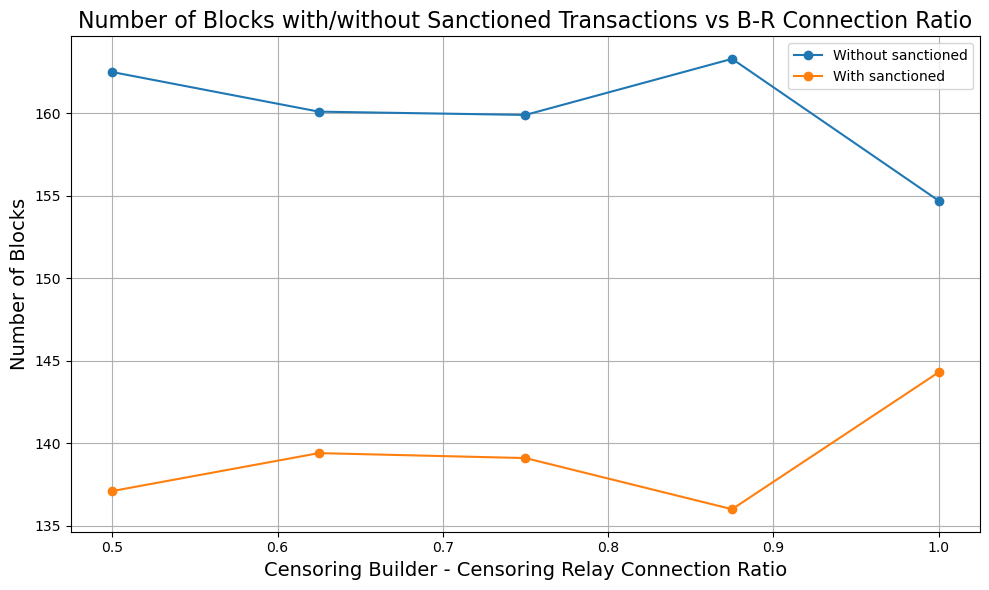

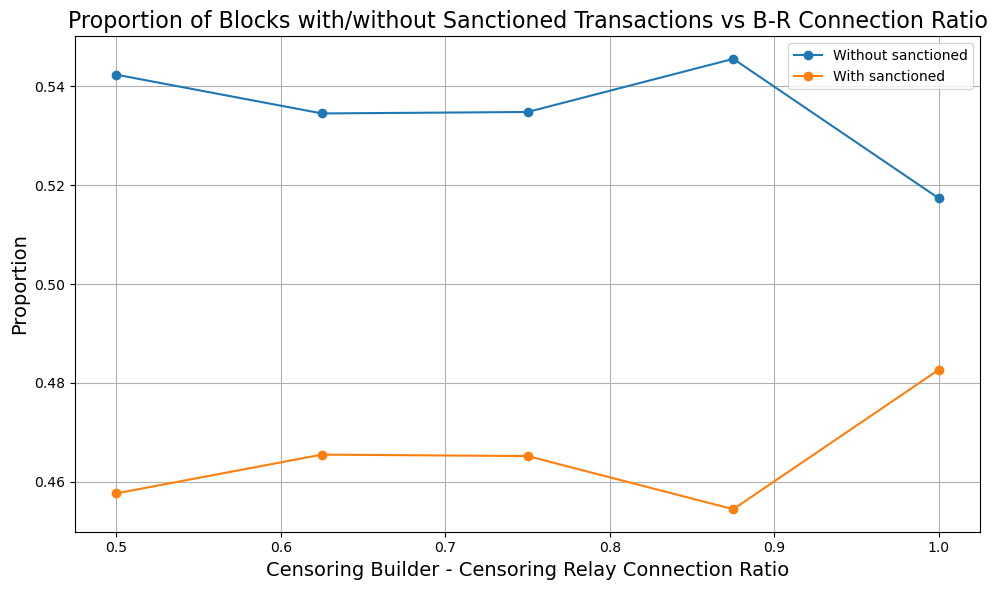

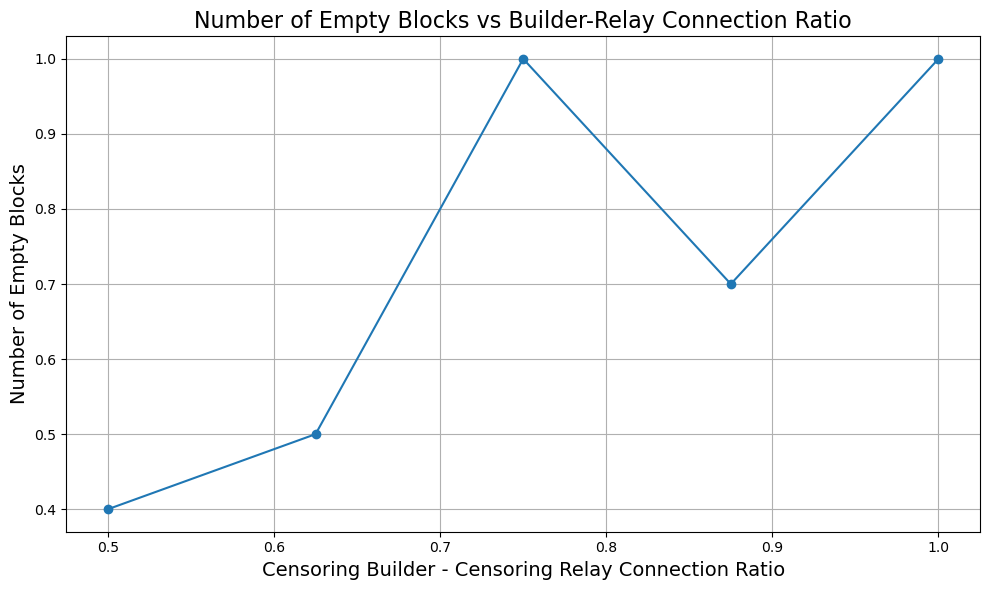

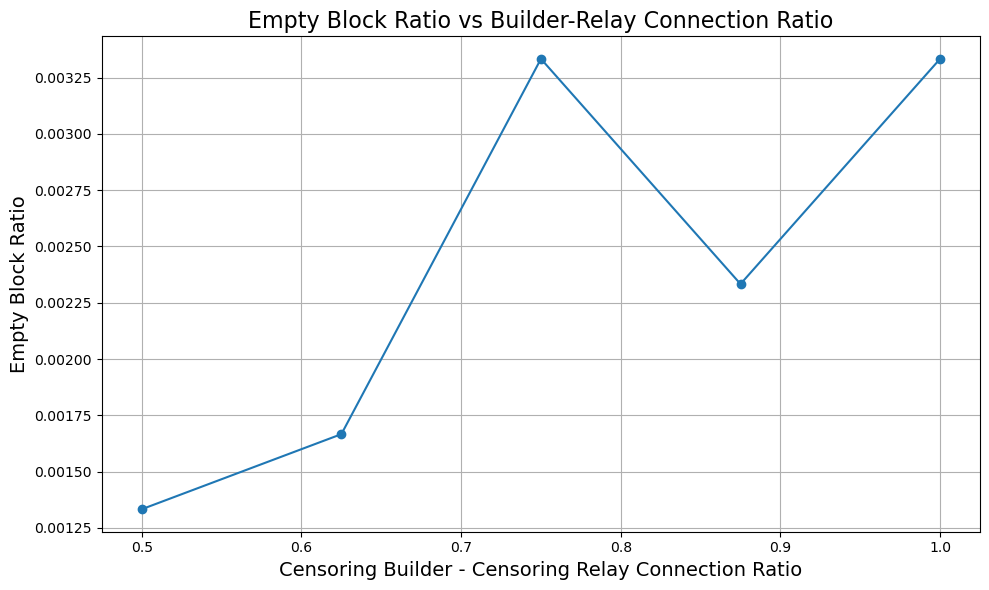

In [ ]:

results_df = pd.DataFrame(results)
results_df['br_ratio'] = results_df['experiment'].str.extract(r'cbrr_(\d+\.\d+)').astype(float)

# Figure 1: Average number of blocks with/without sanctioned transactions
plt.figure(figsize=(10, 6))
plt.plot(results_df['br_ratio'], results_df['avg_blocks_without_sanctioned'], marker='o', label='Without sanctioned')
plt.plot(results_df['br_ratio'], results_df['avg_blocks_with_sanctioned'], marker='o', label='With sanctioned')
plt.xlabel('Censoring Builder - Censoring Relay Connection Ratio', fontsize=14)
plt.ylabel('Number of Blocks', fontsize=14)
plt.title('Number of Blocks with/without Sanctioned Transactions vs B-R Connection Ratio', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Proportion of blocks with/without sanctioned transactions
plt.figure(figsize=(10, 6))
plt.plot(results_df['br_ratio'], results_df['ratio_without_sanctioned'], marker='o', label='Without sanctioned')
plt.plot(results_df['br_ratio'], results_df['ratio_with_sanctioned'], marker='o', label='With sanctioned')
plt.xlabel('Censoring Builder - Censoring Relay Connection Ratio', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.title('Proportion of Blocks with/without Sanctioned Transactions vs B-R Connection Ratio', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 3: Average number of empty blocks
plt.figure(figsize=(10, 6))
plt.plot(results_df['br_ratio'], results_df['avg_empty_blocks'], marker='o')
plt.xlabel('Censoring Builder - Censoring Relay Connection Ratio', fontsize=14)
plt.ylabel('Number of Empty Blocks', fontsize=14)
plt.title('Number of Empty Blocks vs Builder-Relay Connection Ratio', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 4: Empty block ratio
plt.figure(figsize=(10, 6))
plt.plot(results_df['br_ratio'], results_df['empty_block_ratio'], marker='o')
plt.xlabel('Censoring Builder - Censoring Relay Connection Ratio', fontsize=14)
plt.ylabel('Empty Block Ratio', fontsize=14)
plt.title('Empty Block Ratio vs Builder-Relay Connection Ratio', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


#### total_block_value，mean_block_value  - censoring_builder_relay_ratio

In [ ]:
# Calculate block value statistics
def calculate_block_value_stats(exp_blocks, br_ratio):

    run_summary = exp_blocks.groupby('run_id').agg(
        total_block_value=('total_priority_fee', 'sum'),
        num_blocks=('block_id', 'count')
    ).reset_index()


    run_summary['mean_block_value'] = run_summary['total_block_value'] / run_summary['num_blocks']


    avg_total_block_value = run_summary['total_block_value'].mean()
    avg_mean_block_value = run_summary['mean_block_value'].mean()


    avg_total_block_value_eth = avg_total_block_value * 1e-9
    avg_mean_block_value_eth = avg_mean_block_value * 1e-9

    return {
        'br_ratio': br_ratio,
        'avg_total_block_value': avg_total_block_value,
        'avg_mean_block_value': avg_mean_block_value,
        'avg_total_block_value_eth': avg_total_block_value_eth,
        'avg_mean_block_value_eth': avg_mean_block_value_eth
    }


不同censoring_builder_ralay_ratio参数下的总区块价值和平均区块价值:
   br_ratio  avg_total_block_value  avg_mean_block_value  \
0     0.500           1.190818e+10          3.974714e+07   
1     0.625           1.190734e+10          3.975784e+07   
2     0.750           1.190385e+10          3.981306e+07   
3     0.875           1.190852e+10          3.978872e+07   
4     1.000           1.190772e+10          3.982593e+07   

   avg_total_block_value_eth  avg_mean_block_value_eth  
0                  11.908176                  0.039747  
1                  11.907345                  0.039758  
2                  11.903855                  0.039813  
3                  11.908517                  0.039789  
4                  11.907725                  0.039826  


/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


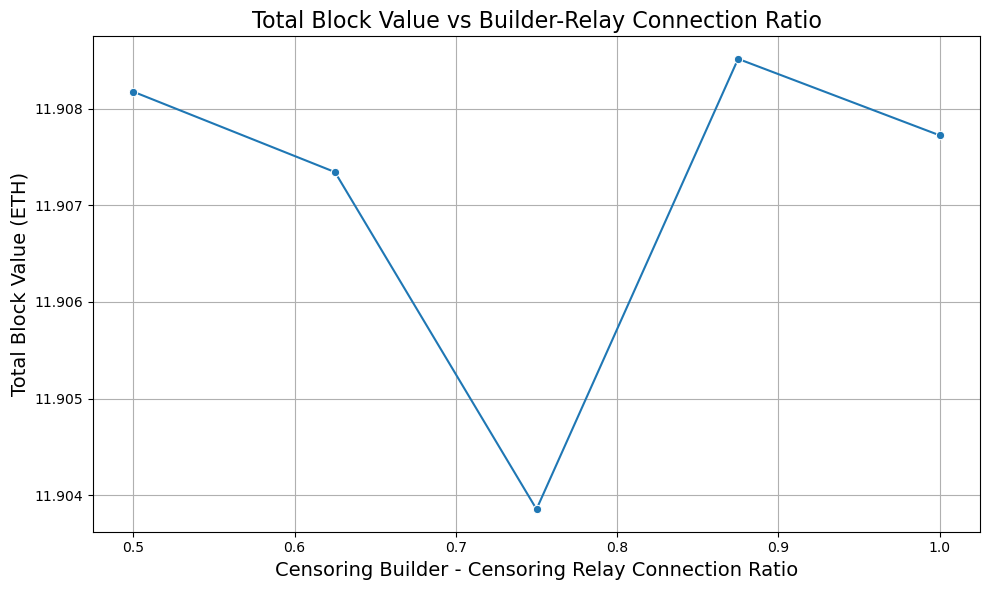

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


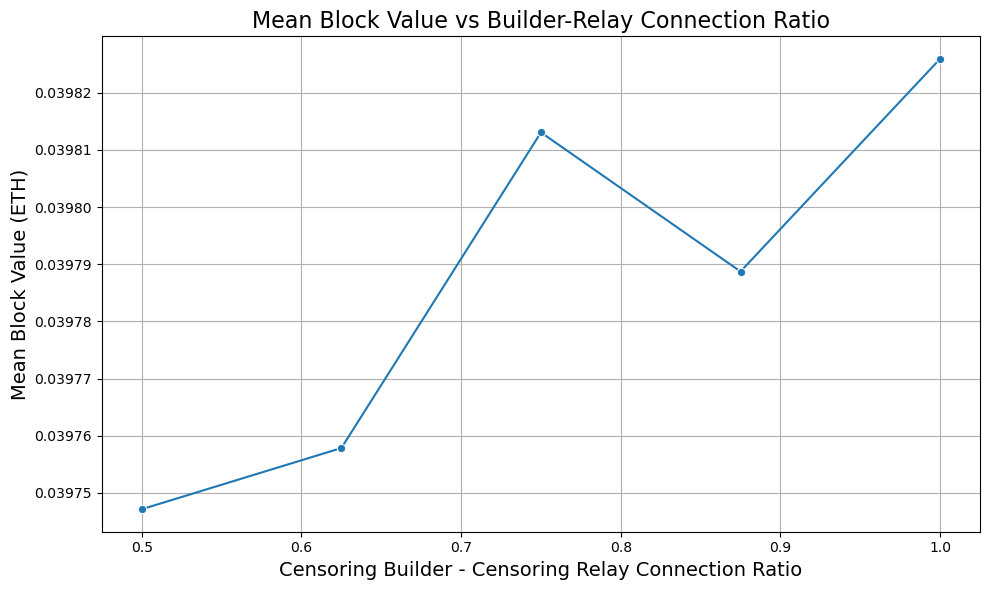

In [ ]:

base_dir = "simulation_results_SA_0608/sensitivity_censoring_br_vr_ratios_20250620_113554"


folders = [
    f for f in os.listdir(base_dir) 
    if re.match(r"censoring_br_vr_ratios_\d+\.\d+_0\.250_", f)
]


def extract_br_ratio(folder_name):
    match = re.search(r"censoring_br_vr_ratios_(\d+\.\d+)_0\.250_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_br_ratio)


results = []



for folder in folders:
    br_ratio = extract_br_ratio(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)


    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()


    stats = calculate_block_value_stats(blocks, br_ratio)
    results.append(stats)


combined_stats = pd.DataFrame(results)


print("不同censoring_builder_ralay_ratio参数下的总区块价值和平均区块价值:")
print(combined_stats.sort_values('br_ratio'))

# Figure 1: Total block value (ETH)
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='br_ratio', y='avg_total_block_value_eth', marker='o')
plt.xlabel('Censoring Builder - Censoring Relay Connection Ratio', fontsize=14)
plt.ylabel('Total Block Value (ETH)', fontsize=14)
plt.title('Total Block Value vs Builder-Relay Connection Ratio', fontsize=16)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Mean block value (ETH)
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='br_ratio', y='avg_mean_block_value_eth', marker='o')
plt.xlabel('Censoring Builder - Censoring Relay Connection Ratio', fontsize=14)
plt.ylabel('Mean Block Value (ETH)', fontsize=14)
plt.title('Mean Block Value vs Builder-Relay Connection Ratio', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Average profit (per block & per node) for builders under different censorship types  - censoring_builder_relay_ratio

In [ ]:
# Calculate builder profit by policy
def calculate_builder_profit_by_policy(exp_blocks, experiment_name):
    
    policy_summary = exp_blocks.groupby(['run_id', 'builder_policy']).agg(
        total_builder_profit=('builder_profit', 'sum'),
        num_blocks=('block_id', 'count'),
        num_builders=('builder_id', pd.Series.nunique)
    ).reset_index()

    all_run_ids = exp_blocks['run_id'].unique()
    total_runs = len(all_run_ids)

    all_policies = ['strict', 'weak', 'non']
    full_index = pd.MultiIndex.from_product([all_run_ids, all_policies], names=['run_id', 'builder_policy'])

    policy_summary = policy_summary.set_index(['run_id', 'builder_policy']).reindex(
        full_index, fill_value=0
    ).reset_index()

    
    policy_summary['mean_profit_per_block'] = policy_summary.apply(
        lambda row: row['total_builder_profit'] / row['num_blocks'] if row['num_blocks'] > 0 else 0, axis=1
    )
    
    policy_summary['mean_profit_per_builder'] = policy_summary.apply(
        lambda row: row['total_builder_profit'] / row['num_builders'] if row['num_builders'] > 0 else 0, axis=1
    )

    
    final_policy_avg = policy_summary.groupby('builder_policy').agg({
        'mean_profit_per_block': 'mean',
        'mean_profit_per_builder': 'mean'
    }).reset_index()

    
    final_policy_avg['mean_builder_profit_per_block(ETH)'] = final_policy_avg['mean_profit_per_block'] * 1e-9
    final_policy_avg['mean_builder_profit_per_builder(ETH)'] = final_policy_avg['mean_profit_per_builder'] * 1e-9

    final_policy_avg['experiment'] = experiment_name

    return final_policy_avg[[
        'builder_policy',
        'mean_builder_profit_per_block(ETH)',
        'mean_builder_profit_per_builder(ETH)',
        'experiment'
    ]]


  builder_policy  mean_builder_profit_per_block(ETH)  \
0            non                            0.002043   
1         strict                            0.001790   
2           weak                            0.002042   
0            non                            0.002043   
1         strict                            0.001787   
2           weak                            0.002019   
0            non                            0.002045   
1         strict                            0.001793   
2           weak                            0.002018   
0            non                            0.002044   
1         strict                            0.001805   
2           weak                            0.002006   
0            non                            0.002075   
1         strict                            0.001661   
2           weak                            0.001710   

   mean_builder_profit_per_builder(ETH)  experiment  br_ratio  
0                              0.041380

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

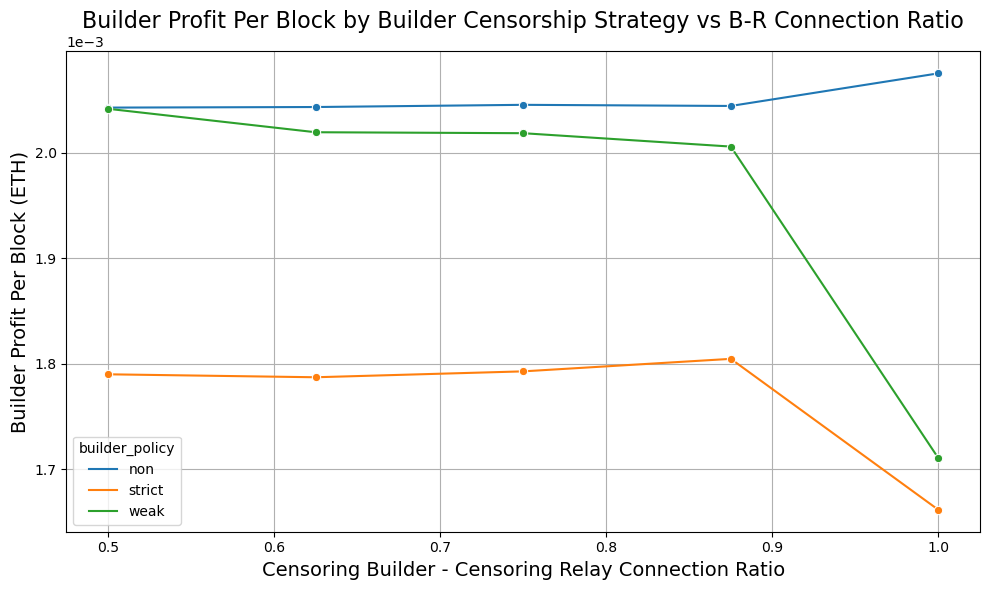

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

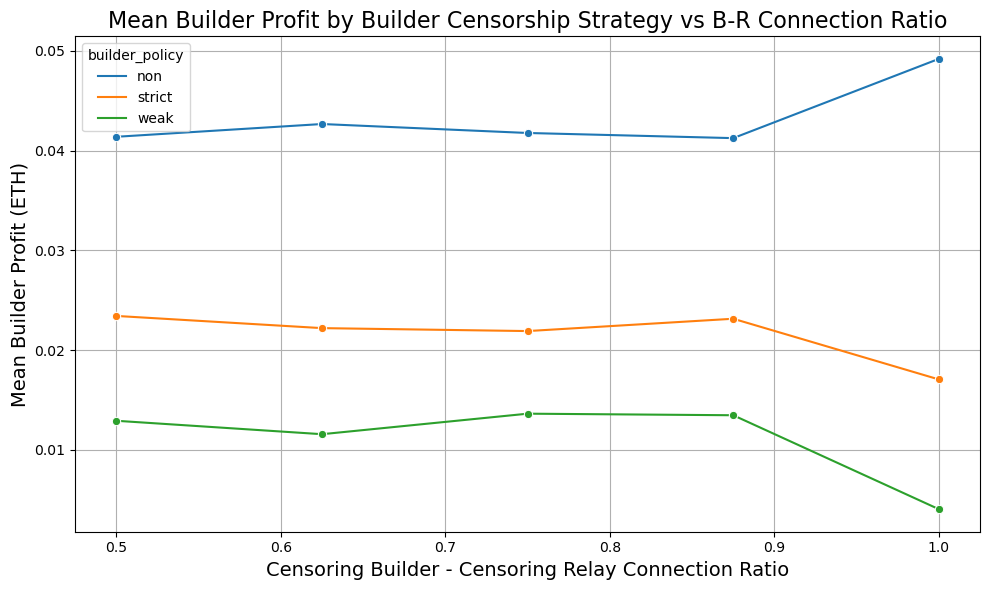

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_censoring_br_vr_ratios_20250620_113554"


folders = [
    f for f in os.listdir(base_dir) 
    if re.match(r"censoring_br_vr_ratios_\d+\.\d+_0\.250_", f)
]


def extract_br_ratio(folder_name):
    match = re.search(r"censoring_br_vr_ratios_(\d+\.\d+)_0\.250_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_br_ratio)


results = []


for folder in folders:
    br_ratio = extract_br_ratio(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)


    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()


    stats = calculate_builder_profit_by_policy(blocks, f'cbrr_{br_ratio:.3f}')
    stats['br_ratio'] = br_ratio
    results.append(stats)


combined_stats = pd.concat(results)


print(combined_stats.sort_values(['br_ratio', 'builder_policy']))

# Figure 1: Builder Profit Per Block by Builder Censorship Strategy vs B-R Connection Ratio
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='br_ratio', y='mean_builder_profit_per_block(ETH)', hue='builder_policy', marker='o')
plt.xlabel('Censoring Builder - Censoring Relay Connection Ratio', fontsize=14)
plt.ylabel('Builder Profit Per Block (ETH)', fontsize=14)
plt.title('Builder Profit Per Block by Builder Censorship Strategy vs B-R Connection Ratio', fontsize=16)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Mean Builder Profit Per Builder by Builder Censorship Strategy vs B-R Connection Ratio
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='br_ratio', y='mean_builder_profit_per_builder(ETH)', hue='builder_policy', marker='o')
plt.xlabel('Censoring Builder - Censoring Relay Connection Ratio', fontsize=14)
plt.ylabel('Mean Builder Profit (ETH)', fontsize=14)
plt.title('Mean Builder Profit by Builder Censorship Strategy vs B-R Connection Ratio', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Average profit (per block & per node) for validators under different censorship types   - censoring_builder_relay_ratio

In [ ]:

# Calculate validator profit by policy

def calculate_validator_profit_by_policy(exp_blocks, experiment_name):
    validator_summary = exp_blocks.groupby(['run_id', 'proposer_validator_is_censoring']).agg(
        total_proposer_profit=('proposer_profit', 'sum'),
        num_blocks=('block_id', 'count'),
        num_validators=('proposer_validator_id', pd.Series.nunique)
    ).reset_index()

    all_run_ids = exp_blocks['run_id'].unique()
    total_runs = len(all_run_ids)

    all_policies = [True, False]
    full_index = pd.MultiIndex.from_product([all_run_ids, all_policies], names=['run_id', 'proposer_validator_is_censoring'])

    validator_summary = validator_summary.set_index(['run_id', 'proposer_validator_is_censoring']).reindex(
        full_index, fill_value=0
    ).reset_index()

    validator_summary['mean_profit_per_block'] = validator_summary.apply(
        lambda row: row['total_proposer_profit'] / row['num_blocks'] if row['num_blocks'] > 0 else 0, axis=1
    )

    validator_summary['mean_profit_per_validator'] = validator_summary.apply(
        lambda row: row['total_proposer_profit'] / row['num_validators'] if row['num_validators'] > 0 else 0, axis=1
    )

    final_validator_avg = validator_summary.groupby('proposer_validator_is_censoring').agg({
        'mean_profit_per_block': 'mean',
        'mean_profit_per_validator': 'mean'
    }).reset_index()

    final_validator_avg['mean_validator_profit_per_block(ETH)'] = final_validator_avg['mean_profit_per_block'] * 1e-9
    final_validator_avg['mean_validator_profit_per_validator(ETH)'] = final_validator_avg['mean_profit_per_validator'] * 1e-9

    final_validator_avg['experiment'] = experiment_name

    return final_validator_avg[[
        'proposer_validator_is_censoring',
        'mean_validator_profit_per_block(ETH)',
        'mean_validator_profit_per_validator(ETH)',
        'experiment'
    ]]


   proposer_validator_is_censoring  mean_validator_profit_per_block(ETH)  \
0                            False                              0.039215   
1                             True                              0.031724   
0                            False                              0.039215   
1                             True                              0.031802   
0                            False                              0.039276   
1                             True                              0.031720   
0                            False                              0.039218   
1                             True                              0.031873   
0                            False                              0.039351   
1                             True                              0.031502   

   mean_validator_profit_per_validator(ETH)  experiment  br_ratio  
0                                  1.184001  cbrr_0.500     0.500  
1                          

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

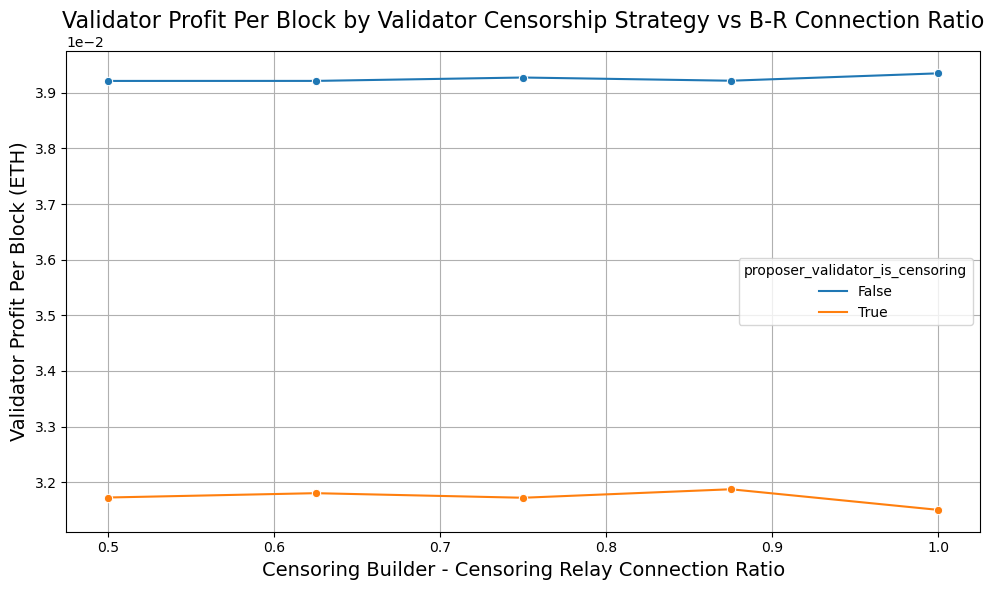

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

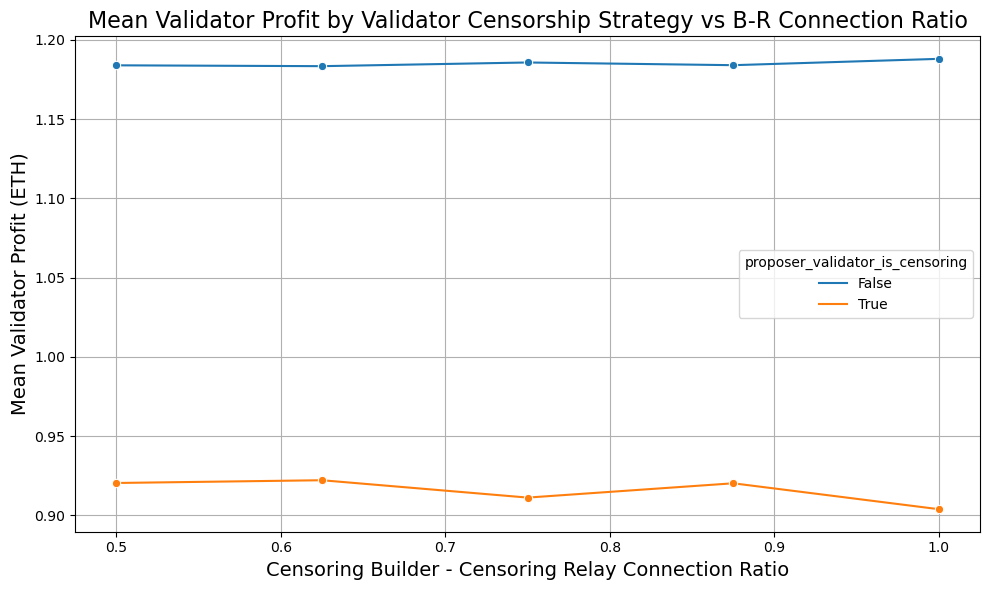

In [ ]:

base_dir = "simulation_results_SA_0608/sensitivity_censoring_br_vr_ratios_20250620_113554"


folders = [
    f for f in os.listdir(base_dir) 
    if re.match(r"censoring_br_vr_ratios_\d+\.\d+_0\.250_", f)
]


def extract_br_ratio(folder_name):
    match = re.search(r"censoring_br_vr_ratios_(\d+\.\d+)_0\.250_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_br_ratio)


results = []


for folder in folders:
    br_ratio = extract_br_ratio(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)


    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()


    stats = calculate_validator_profit_by_policy(blocks, f'cbrr_{br_ratio:.3f}')
    stats['br_ratio'] = br_ratio
    results.append(stats)


combined_stats = pd.concat(results)


print(combined_stats.sort_values(['br_ratio', 'proposer_validator_is_censoring']))

# Figure 1: Average Validator Profit Per Block by Validator Censorship Strategy vs B-R Connection Ratio
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='br_ratio', y='mean_validator_profit_per_block(ETH)', hue='proposer_validator_is_censoring', marker='o')
plt.xlabel('Censoring Builder - Censoring Relay Connection Ratio', fontsize=14)
plt.ylabel('Validator Profit Per Block (ETH)', fontsize=14)
plt.title('Validator Profit Per Block by Validator Censorship Strategy vs B-R Connection Ratio', fontsize=16)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Mean Validator Profit Per Validator by Validator Censorship Strategy vs B-R Connection Ratio
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='br_ratio', y='mean_validator_profit_per_validator(ETH)', hue='proposer_validator_is_censoring', marker='o')
plt.xlabel('Censoring Builder - Censoring Relay Connection Ratio', fontsize=14)
plt.ylabel('Mean Validator Profit (ETH)', fontsize=14)
plt.title('Mean Validator Profit by Validator Censorship Strategy vs B-R Connection Ratio', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Transaction Delay - censoring_validator_relay_ratio_non_censoring

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_censoring_br_vr_ratios_20250620_113554"


combined_transactions = pd.DataFrame()


folders = [
    f for f in os.listdir(base_dir) 
    if re.match(r"censoring_br_vr_ratios_0\.750_\d+\.\d+_", f)
]


def extract_vr_ratio(folder_name):
    match = re.search(r"censoring_br_vr_ratios_0\.750_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_vr_ratio)


for folder in folders:
    vr_ratio = extract_vr_ratio(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "transactions.csv")

    transactions = pd.read_csv(file_path, low_memory=False)
    transactions = transactions[transactions['is_proposed']].copy()


    if transactions.empty:
        print(f"Warning: No proposed transactions found in folder {folder}")
        continue

    transactions['proposal_delay'] = transactions['proposed_time'] - transactions['arrival_time']
    transactions['sanctioned_type'] = transactions['sanctioned_type'].map({0: 'Non-sanctioned (0)', 1: 'Sanctioned (1)'})
    transactions['experiment'] = f"cvrr_{vr_ratio:.3f}"

    combined_transactions = pd.concat([combined_transactions, transactions], ignore_index=True)


if combined_transactions.empty:
    print("No transactions data available after filtering.")
else:

    negative_delay_txs = combined_transactions[combined_transactions['proposal_delay'] < 0]
    print("Transactions with negative proposal delay:")
    print(negative_delay_txs if not negative_delay_txs.empty else "None found")


run_stats = combined_transactions.groupby(['experiment', 'run_id', 'sanctioned_type'])['proposal_delay'].agg(['mean', 'std']).reset_index()
final_stats = run_stats.groupby(['experiment', 'sanctioned_type']).agg({
    'mean': 'mean',
    'std': 'mean'
}).reset_index()

print("\nProposal Delay Statistics by Experiment and Sanctioned Type (averaged by run_id):")
print(final_stats)


Transactions with negative proposal delay:
None found

Proposal Delay Statistics by Experiment and Sanctioned Type (averaged by run_id):
   experiment     sanctioned_type       mean        std
0  cvrr_0.000  Non-sanctioned (0)  18.064745  21.226725
1  cvrr_0.000      Sanctioned (1)  30.808477  67.076378
2  cvrr_0.125  Non-sanctioned (0)  18.064745  21.226725
3  cvrr_0.125      Sanctioned (1)  30.808477  67.076378
4  cvrr_0.250  Non-sanctioned (0)  18.828584  28.265496
5  cvrr_0.250      Sanctioned (1)  32.608681  73.826906
6  cvrr_0.375  Non-sanctioned (0)  17.238723  16.456688
7  cvrr_0.375      Sanctioned (1)  28.628375  60.486086
8  cvrr_0.500  Non-sanctioned (0)  19.256315  30.865754
9  cvrr_0.500      Sanctioned (1)  32.150141  74.551070


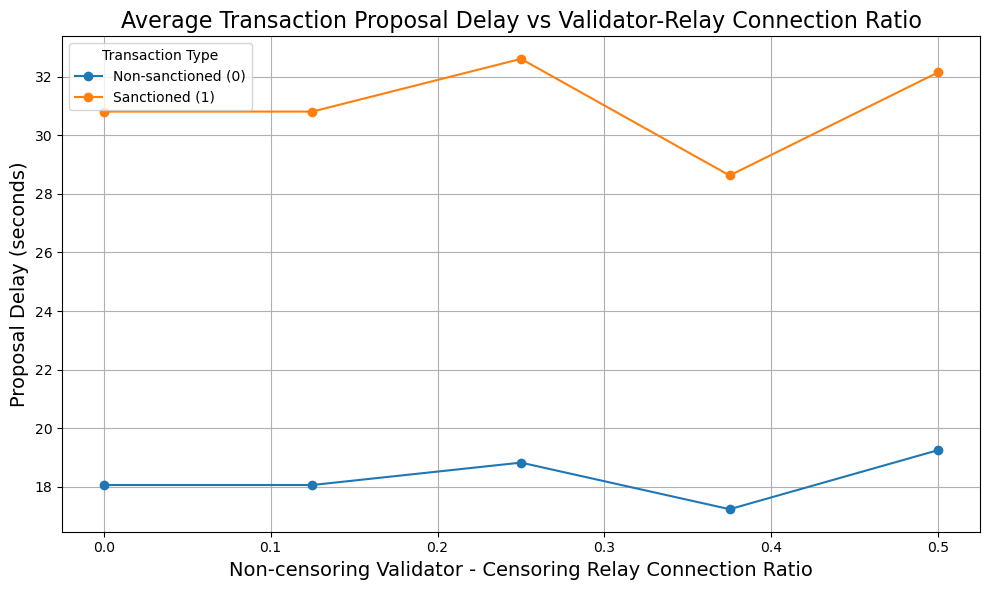

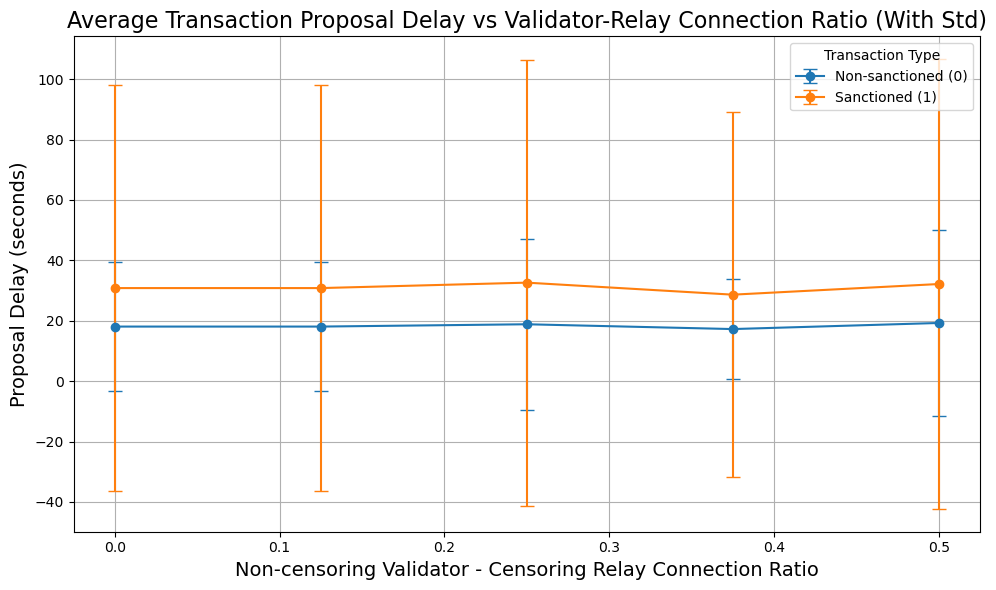

In [ ]:

final_stats['censoring_validator_relay_ratio_no_censoring'] = final_stats['experiment'].str.extract(r'cvrr_(\d+\.\d+)').astype(float)


fig, ax = plt.subplots(figsize=(10, 6))
for label, group in final_stats.groupby('sanctioned_type'):
    ax.plot(group['censoring_validator_relay_ratio_no_censoring'], group['mean'], '-o', label=label)

ax.set_xlabel('Non-censoring Validator - Censoring Relay Connection Ratio', fontsize=14)
ax.set_ylabel('Proposal Delay (seconds)', fontsize=14)
ax.set_title('Average Transaction Proposal Delay vs Validator-Relay Connection Ratio', fontsize=16)
ax.legend(title='Transaction Type')
ax.grid(True)
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(10, 6))
for label, group in final_stats.groupby('sanctioned_type'):
    ax.errorbar(group['censoring_validator_relay_ratio_no_censoring'], group['mean'], yerr=group['std'],
                fmt='-o', label=label, capsize=5)

ax.set_xlabel('Non-censoring Validator - Censoring Relay Connection Ratio', fontsize=14)
ax.set_ylabel('Proposal Delay (seconds)', fontsize=14)
ax.set_title('Average Transaction Proposal Delay vs Validator-Relay Connection Ratio (With Std)', fontsize=16)
ax.legend(title='Transaction Type')
ax.grid(True)
plt.tight_layout()
plt.show()


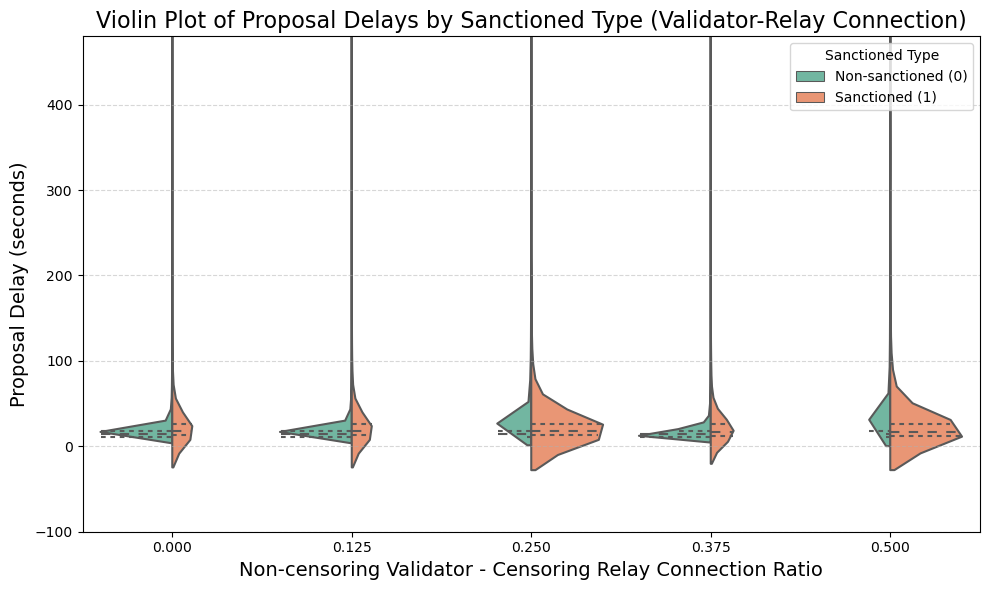

In [ ]:


plt.figure(figsize=(10, 6))

sns.violinplot(
    data=combined_transactions,
    x='experiment',
    y='proposal_delay',
    hue='sanctioned_type',
    split=True,
    inner='quartile',
    palette='Set2',
    clip=(0, 480),
)


current_labels = plt.gca().get_xticklabels()
new_labels = [f"{float(label.get_text()[-5:]):.3f}" for label in current_labels]
plt.gca().set_xticklabels(new_labels)

plt.ylim(-100, 480)
plt.xlabel('Non-censoring Validator - Censoring Relay Connection Ratio', fontsize=14)
plt.ylabel('Proposal Delay (seconds)', fontsize=14)
plt.title('Violin Plot of Proposal Delays by Sanctioned Type (Validator-Relay Connection)', fontsize=16)

plt.legend(title='Sanctioned Type', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### The number/proportion of blocks containing sanctioned transactions
#### The number/proportion of empty blocks
#### -  censoring_validator_relay_ratio_no_censoring

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_censoring_br_vr_ratios_20250620_113554"


combined_transactions = pd.DataFrame()


folders = [
    f for f in os.listdir(base_dir) 
    if re.match(r"censoring_br_vr_ratios_0\.750_\d+\.\d+_", f)
]


def extract_vr_ratio(folder_name):
    match = re.search(r"censoring_br_vr_ratios_0\.750_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_vr_ratio)


results = []

for folder in folders:
    vr_ratio = extract_vr_ratio(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)

    run_ids = blocks['run_id'].unique()


    run_metrics = []

    for run in run_ids:
        run_blocks = blocks[blocks['run_id'] == run]

        non_empty_blocks = run_blocks[(run_blocks['is_proposed']) & (run_blocks['builder_id'] != 'PROPOSER')].copy()
        non_empty_blocks['contains_sanctioned'] = non_empty_blocks['num_sanctioned_tx'] > 0

        blocks_with_sanctioned = non_empty_blocks['contains_sanctioned'].sum()
        blocks_without_sanctioned = (~non_empty_blocks['contains_sanctioned']).sum()
        total_non_empty_blocks = len(non_empty_blocks)

        empty_blocks = run_blocks[(run_blocks['is_proposed']) & (run_blocks['builder_id'] == 'PROPOSER')]
        total_empty_blocks = empty_blocks.shape[0]
        total_proposed_blocks = total_non_empty_blocks + total_empty_blocks

   
        ratio_with_sanctioned = blocks_with_sanctioned / total_non_empty_blocks if total_non_empty_blocks > 0 else 0
        ratio_without_sanctioned = blocks_without_sanctioned / total_non_empty_blocks if total_non_empty_blocks > 0 else 0
        empty_block_ratio = total_empty_blocks / total_proposed_blocks if total_proposed_blocks > 0 else 0

        run_metrics.append({
            'blocks_with_sanctioned': blocks_with_sanctioned,
            'blocks_without_sanctioned': blocks_without_sanctioned,
            'empty_blocks': total_empty_blocks,
            'ratio_with_sanctioned': ratio_with_sanctioned,
            'ratio_without_sanctioned': ratio_without_sanctioned,
            'empty_block_ratio': empty_block_ratio
        })

   
    metrics_df = pd.DataFrame(run_metrics)

    results.append({
        'experiment': f'cvrr_{vr_ratio:.3f}',
        'avg_blocks_with_sanctioned': metrics_df['blocks_with_sanctioned'].mean(),
        'avg_blocks_without_sanctioned': metrics_df['blocks_without_sanctioned'].mean(),
        'ratio_with_sanctioned': metrics_df['ratio_with_sanctioned'].mean(),
        'ratio_without_sanctioned': metrics_df['ratio_without_sanctioned'].mean(),
        'avg_empty_blocks': metrics_df['empty_blocks'].mean(),
        'empty_block_ratio': metrics_df['empty_block_ratio'].mean()
    })

    print(f"\nExperiment: cvrr_{vr_ratio:.3f}")
    print(f"平均含 sanctioned_type=1 交易的区块数量: {metrics_df['blocks_with_sanctioned'].mean():.6f}")
    print(f"平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: {metrics_df['blocks_without_sanctioned'].mean():.6f}")
    print(f"含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: {metrics_df['ratio_with_sanctioned'].mean():.2%}")
    print(f"不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: {metrics_df['ratio_without_sanctioned'].mean():.2%}")
    print(f"平均空区块数量: {metrics_df['empty_blocks'].mean():.6f}")
    print(f"空区块占所有已提议区块的比例: {metrics_df['empty_block_ratio'].mean():.2%}")



Experiment: cvrr_0.000
平均含 sanctioned_type=1 交易的区块数量: 140.200000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 158.900000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 46.87%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 53.13%
平均空区块数量: 0.900000
空区块占所有已提议区块的比例: 0.30%

Experiment: cvrr_0.125
平均含 sanctioned_type=1 交易的区块数量: 140.200000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 158.900000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 46.87%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 53.13%
平均空区块数量: 0.900000
空区块占所有已提议区块的比例: 0.30%

Experiment: cvrr_0.250
平均含 sanctioned_type=1 交易的区块数量: 139.100000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 159.900000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 46.52%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 53.48%
平均空区块数量: 1.000000
空区块占所有已提议区块的比例: 0.33%

Experiment: cvrr_0.375
平均含 sanctioned_type=1 交易的区块数量: 137.900000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 161.800000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 46.01%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 53.99%
平均空区块数量: 0.300000
空区块占所有已提议区块的比例: 0.

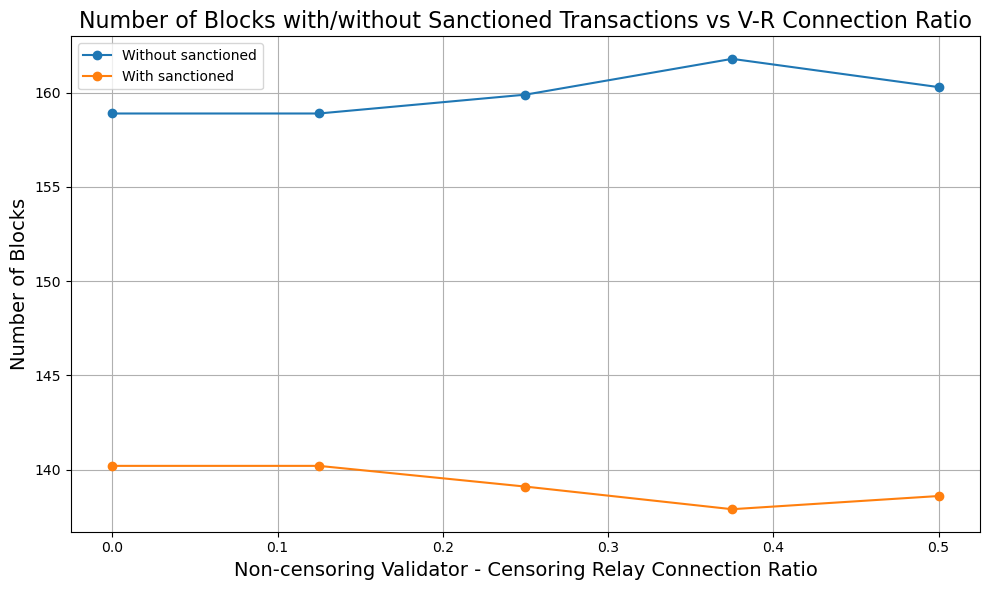

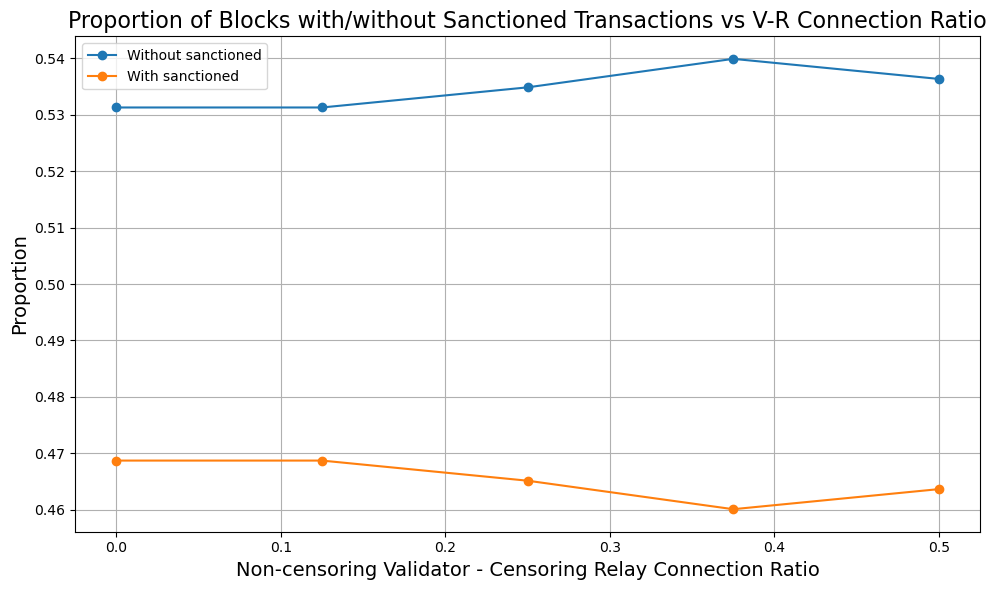

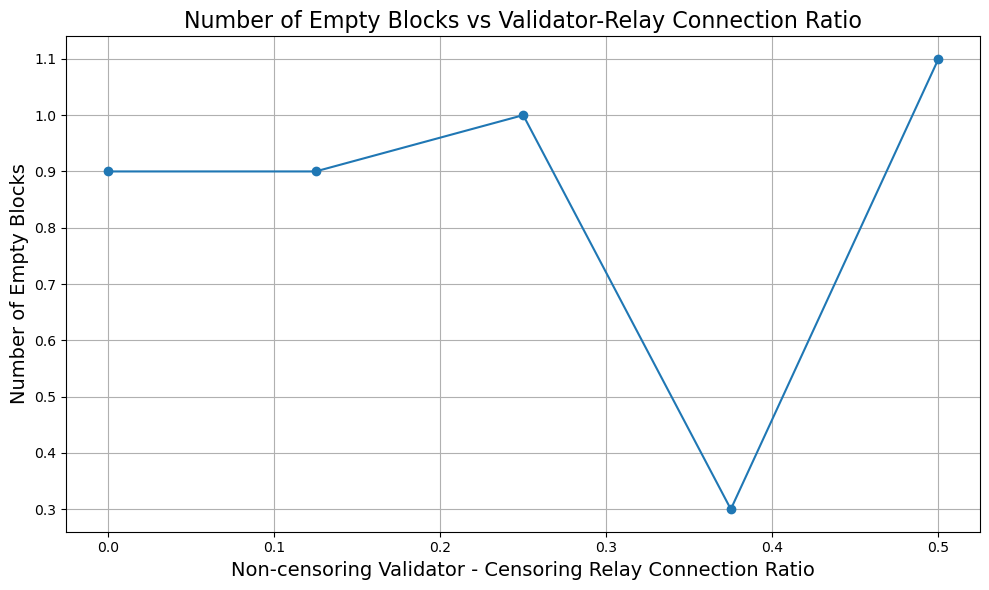

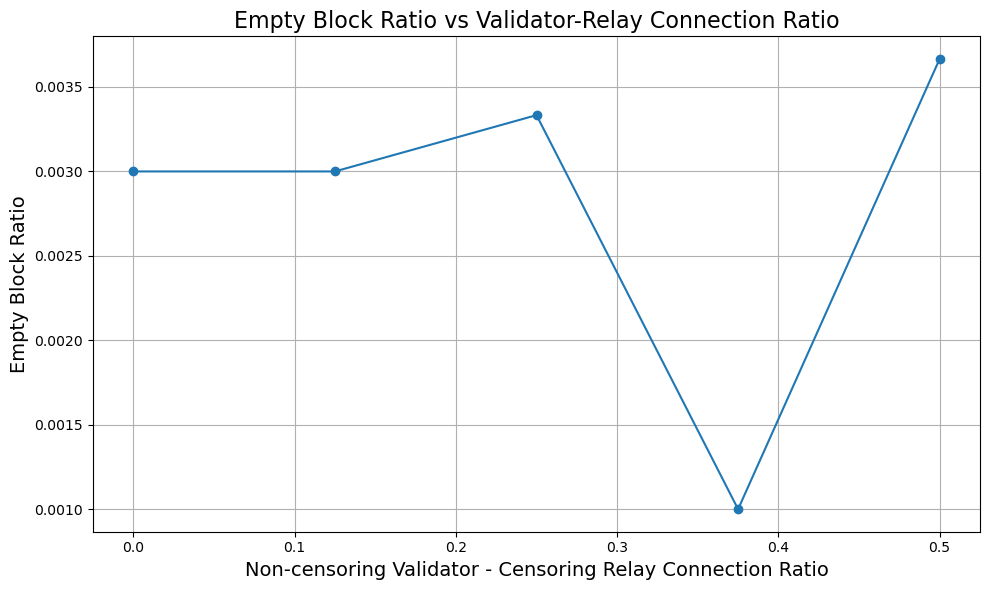

In [ ]:

results_df = pd.DataFrame(results)
results_df['vr_ratio'] = results_df['experiment'].str.extract(r'cvrr_(\d+\.\d+)').astype(float)

# Figure 1: Average number of blocks with/without sanctioned transactions
plt.figure(figsize=(10, 6))
plt.plot(results_df['vr_ratio'], results_df['avg_blocks_without_sanctioned'], marker='o', label='Without sanctioned')
plt.plot(results_df['vr_ratio'], results_df['avg_blocks_with_sanctioned'], marker='o', label='With sanctioned')
plt.xlabel('Non-censoring Validator - Censoring Relay Connection Ratio', fontsize=14)
plt.ylabel('Number of Blocks', fontsize=14)
plt.title('Number of Blocks with/without Sanctioned Transactions vs V-R Connection Ratio', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Proportion of blocks with/without sanctioned transactions
plt.figure(figsize=(10, 6))
plt.plot(results_df['vr_ratio'], results_df['ratio_without_sanctioned'], marker='o', label='Without sanctioned')
plt.plot(results_df['vr_ratio'], results_df['ratio_with_sanctioned'], marker='o', label='With sanctioned')
plt.xlabel('Non-censoring Validator - Censoring Relay Connection Ratio', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.title('Proportion of Blocks with/without Sanctioned Transactions vs V-R Connection Ratio', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 3: Average number of empty blocks
plt.figure(figsize=(10, 6))
plt.plot(results_df['vr_ratio'], results_df['avg_empty_blocks'], marker='o')
plt.xlabel('Non-censoring Validator - Censoring Relay Connection Ratio', fontsize=14)
plt.ylabel('Number of Empty Blocks', fontsize=14)
plt.title('Number of Empty Blocks vs Validator-Relay Connection Ratio', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 4: Empty block ratio
plt.figure(figsize=(10, 6))
plt.plot(results_df['vr_ratio'], results_df['empty_block_ratio'], marker='o')
plt.xlabel('Non-censoring Validator - Censoring Relay Connection Ratio', fontsize=14)
plt.ylabel('Empty Block Ratio', fontsize=14)
plt.title('Empty Block Ratio vs Validator-Relay Connection Ratio', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


####  total_block_value，mean_block_value - censoring_validator_relay_ratio_no_censoring

In [ ]:
# Calculate block value statistics 
def calculate_block_value_stats(exp_blocks, vr_ratio):

    run_summary = exp_blocks.groupby('run_id').agg(
        total_block_value=('total_priority_fee', 'sum'),
        num_blocks=('block_id', 'count')
    ).reset_index()

 
    run_summary['mean_block_value'] = run_summary['total_block_value'] / run_summary['num_blocks']


    avg_total_block_value = run_summary['total_block_value'].mean()
    avg_mean_block_value = run_summary['mean_block_value'].mean()


    avg_total_block_value_eth = avg_total_block_value * 1e-9
    avg_mean_block_value_eth = avg_mean_block_value * 1e-9

    return {
        'vr_ratio': vr_ratio,
        'avg_total_block_value': avg_total_block_value,
        'avg_mean_block_value': avg_mean_block_value,
        'avg_total_block_value_eth': avg_total_block_value_eth,
        'avg_mean_block_value_eth': avg_mean_block_value_eth
    }


不同censoring_validator_relay_ratio_no_censoring参数下的总区块价值和平均区块价值:
   vr_ratio  avg_total_block_value  avg_mean_block_value  \
0     0.000           1.190808e+10          3.981349e+07   
1     0.125           1.190808e+10          3.981349e+07   
2     0.250           1.190385e+10          3.981306e+07   
3     0.375           1.190440e+10          3.972111e+07   
4     0.500           1.190838e+10          3.984195e+07   

   avg_total_block_value_eth  avg_mean_block_value_eth  
0                  11.908084                  0.039813  
1                  11.908084                  0.039813  
2                  11.903855                  0.039813  
3                  11.904403                  0.039721  
4                  11.908384                  0.039842  


/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


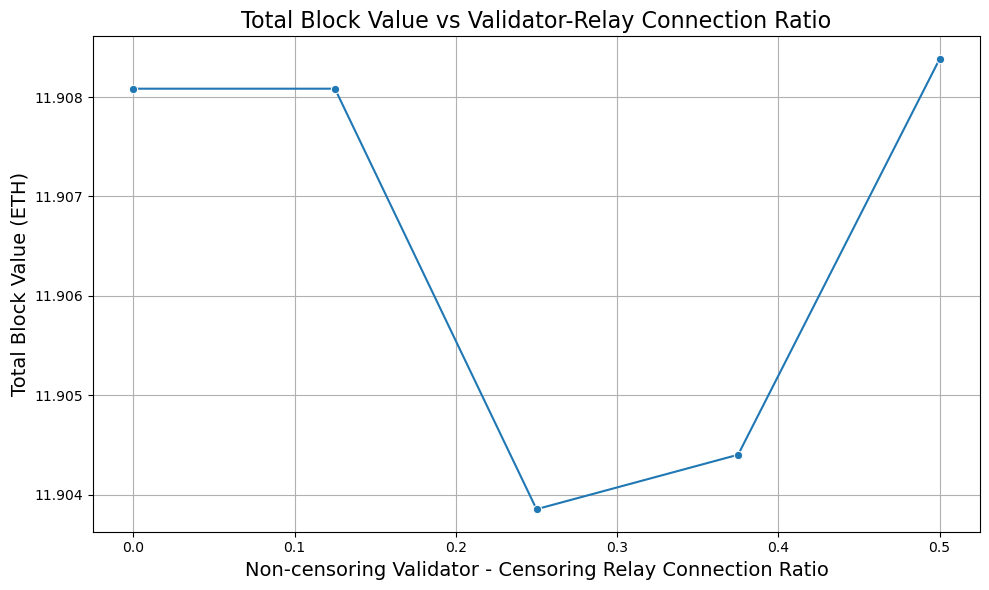

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


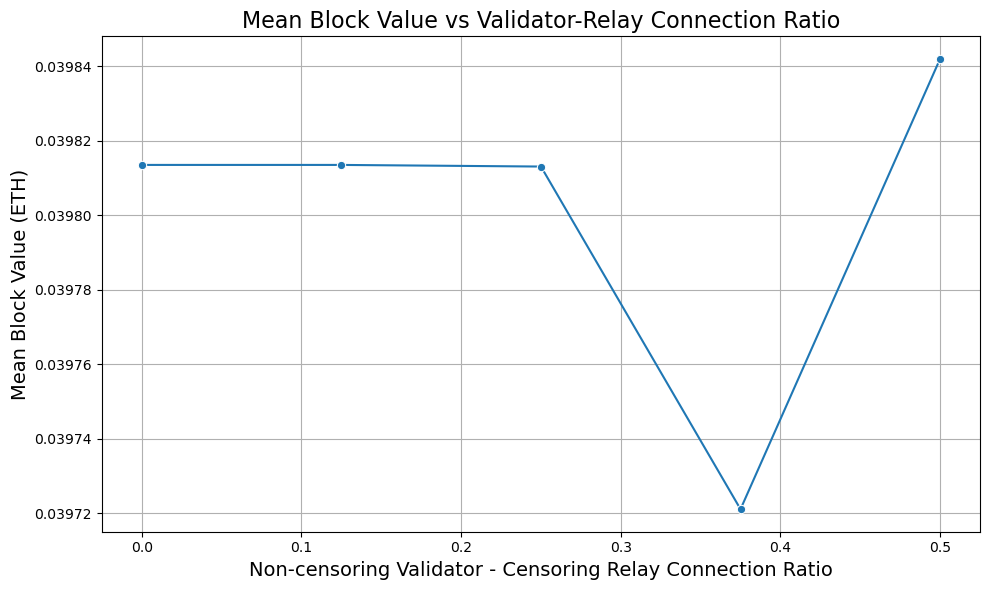

In [ ]:

base_dir = "simulation_results_SA_0608/sensitivity_censoring_br_vr_ratios_20250620_113554"


folders = [
    f for f in os.listdir(base_dir) 
    if re.match(r"censoring_br_vr_ratios_0\.750_\d+\.\d+_", f)
]


def extract_vr_ratio(folder_name):
    match = re.search(r"censoring_br_vr_ratios_0\.750_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_vr_ratio)


results = []



for folder in folders:
    vr_ratio = extract_vr_ratio(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)


    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()


    stats = calculate_block_value_stats(blocks, vr_ratio)
    results.append(stats)


combined_stats = pd.DataFrame(results)


print("不同censoring_validator_relay_ratio_no_censoring参数下的总区块价值和平均区块价值:")
print(combined_stats.sort_values('vr_ratio'))

# Figure 1: Total block value (ETH)
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='vr_ratio', y='avg_total_block_value_eth', marker='o')
plt.xlabel('Non-censoring Validator - Censoring Relay Connection Ratio', fontsize=14)
plt.ylabel('Total Block Value (ETH)', fontsize=14)
plt.title('Total Block Value vs Validator-Relay Connection Ratio', fontsize=16)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Mean block value (ETH)
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='vr_ratio', y='avg_mean_block_value_eth', marker='o')
plt.xlabel('Non-censoring Validator - Censoring Relay Connection Ratio', fontsize=14)
plt.ylabel('Mean Block Value (ETH)', fontsize=14)
plt.title('Mean Block Value vs Validator-Relay Connection Ratio', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Average profit (per block & per node) for builders under different censorship types  - censoring_validator_relay_ratio_no_censoring

In [ ]:
# Calculate builder profit by policy
def calculate_builder_profit_by_policy(exp_blocks, experiment_name):
    
    policy_summary = exp_blocks.groupby(['run_id', 'builder_policy']).agg(
        total_builder_profit=('builder_profit', 'sum'),
        num_blocks=('block_id', 'count'),
        num_builders=('builder_id', pd.Series.nunique)
    ).reset_index()

    all_run_ids = exp_blocks['run_id'].unique()
    total_runs = len(all_run_ids)

    all_policies = ['strict', 'weak', 'non']
    full_index = pd.MultiIndex.from_product([all_run_ids, all_policies], names=['run_id', 'builder_policy'])

    policy_summary = policy_summary.set_index(['run_id', 'builder_policy']).reindex(
        full_index, fill_value=0
    ).reset_index()

    
    policy_summary['mean_profit_per_block'] = policy_summary.apply(
        lambda row: row['total_builder_profit'] / row['num_blocks'] if row['num_blocks'] > 0 else 0, axis=1
    )
    
    policy_summary['mean_profit_per_builder'] = policy_summary.apply(
        lambda row: row['total_builder_profit'] / row['num_builders'] if row['num_builders'] > 0 else 0, axis=1
    )

    
    final_policy_avg = policy_summary.groupby('builder_policy').agg({
        'mean_profit_per_block': 'mean',
        'mean_profit_per_builder': 'mean'
    }).reset_index()

   
    final_policy_avg['mean_builder_profit_per_block(ETH)'] = final_policy_avg['mean_profit_per_block'] * 1e-9
    final_policy_avg['mean_builder_profit_per_builder(ETH)'] = final_policy_avg['mean_profit_per_builder'] * 1e-9

    final_policy_avg['experiment'] = experiment_name

    return final_policy_avg[[
        'builder_policy',
        'mean_builder_profit_per_block(ETH)',
        'mean_builder_profit_per_builder(ETH)',
        'experiment'
    ]]


  builder_policy  mean_builder_profit_per_block(ETH)  \
0            non                            0.002044   
1         strict                            0.001798   
2           weak                            0.002004   
0            non                            0.002044   
1         strict                            0.001798   
2           weak                            0.002004   
0            non                            0.002045   
1         strict                            0.001793   
2           weak                            0.002018   
0            non                            0.002041   
1         strict                            0.001779   
2           weak                            0.002018   
0            non                            0.002048   
1         strict                            0.001773   
2           weak                            0.002040   

   mean_builder_profit_per_builder(ETH)  experiment  vr_ratio  
0                              0.042185

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

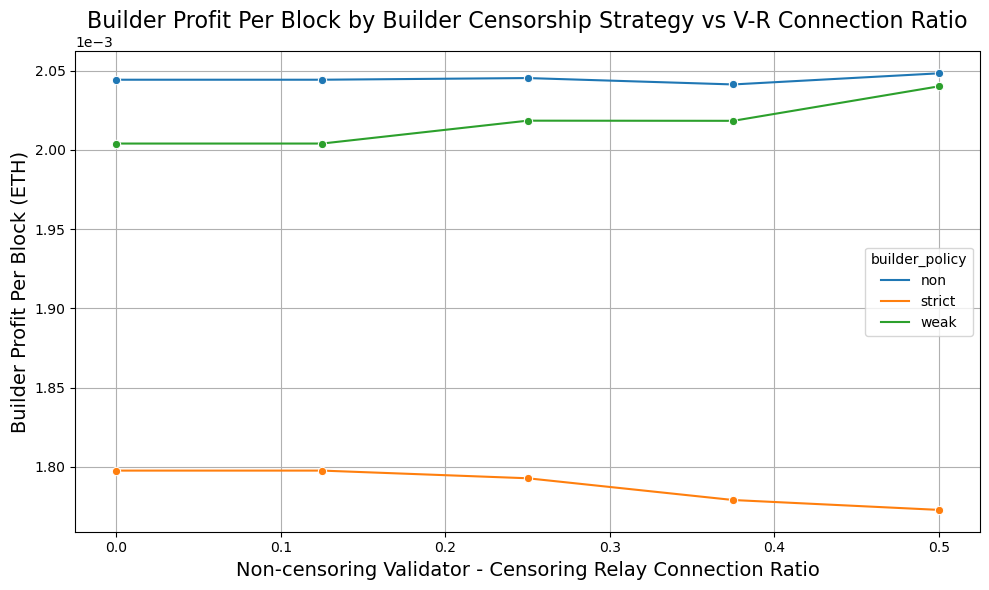

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

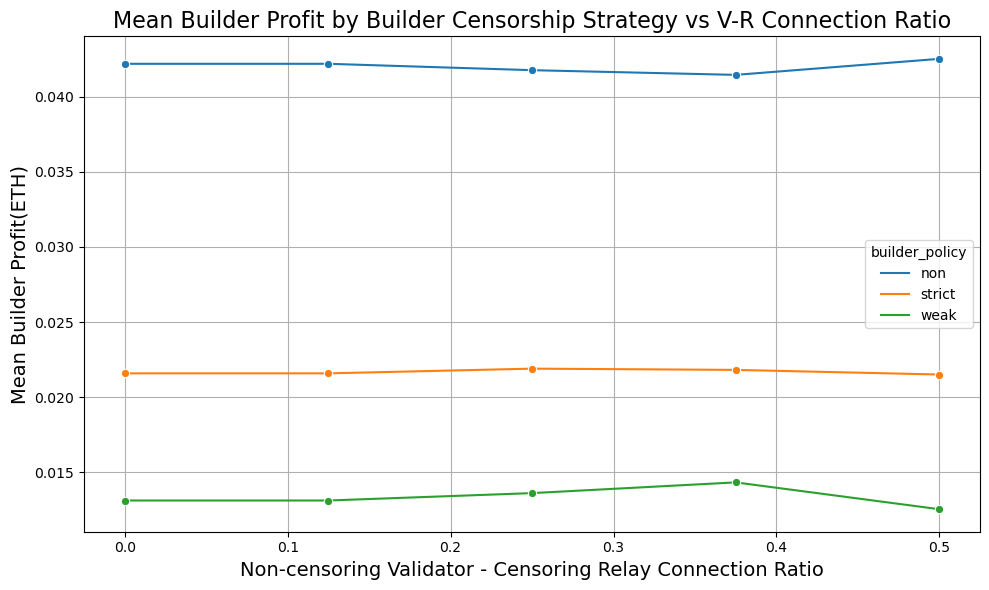

In [ ]:

base_dir = "simulation_results_SA_0608/sensitivity_censoring_br_vr_ratios_20250620_113554"


combined_transactions = pd.DataFrame()


folders = [
    f for f in os.listdir(base_dir) 
    if re.match(r"censoring_br_vr_ratios_0\.750_\d+\.\d+_", f)
]


def extract_vr_ratio(folder_name):
    match = re.search(r"censoring_br_vr_ratios_0\.750_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_vr_ratio)


results = []


for folder in folders:
    vr_ratio = extract_vr_ratio(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)


    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()


    stats = calculate_builder_profit_by_policy(blocks, f'cvrr_{vr_ratio:.3f}')
    stats['vr_ratio'] = vr_ratio
    results.append(stats)


combined_stats = pd.concat(results)


print(combined_stats.sort_values(['vr_ratio', 'builder_policy']))

# Figure 1: Builder Profit Per Block by Builder Censorship Strategy vs V-R Connection Ratio
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='vr_ratio', y='mean_builder_profit_per_block(ETH)', hue='builder_policy', marker='o')
plt.xlabel('Non-censoring Validator - Censoring Relay Connection Ratio', fontsize=14)
plt.ylabel('Builder Profit Per Block (ETH)', fontsize=14)
plt.title('Builder Profit Per Block by Builder Censorship Strategy vs V-R Connection Ratio', fontsize=16)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Mean Builder Profit Per Builder by Builder Censorship Strategy vs V-R Connection Ratio
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='vr_ratio', y='mean_builder_profit_per_builder(ETH)', hue='builder_policy', marker='o')
plt.xlabel('Non-censoring Validator - Censoring Relay Connection Ratio', fontsize=14)
plt.ylabel('Mean Builder Profit(ETH)', fontsize=14)
plt.title('Mean Builder Profit by Builder Censorship Strategy vs V-R Connection Ratio', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Average profit (per block & per node) for validators under different censorship types  - censoring_validator_relay_ratio_no_censoring

In [ ]:

# Calculate validator profit by policy

def calculate_validator_profit_by_policy(exp_blocks, experiment_name):
    validator_summary = exp_blocks.groupby(['run_id', 'proposer_validator_is_censoring']).agg(
        total_proposer_profit=('proposer_profit', 'sum'),
        num_blocks=('block_id', 'count'),
        num_validators=('proposer_validator_id', pd.Series.nunique)
    ).reset_index()

    all_run_ids = exp_blocks['run_id'].unique()
    total_runs = len(all_run_ids)

    all_policies = [True, False]
    full_index = pd.MultiIndex.from_product([all_run_ids, all_policies], names=['run_id', 'proposer_validator_is_censoring'])

    validator_summary = validator_summary.set_index(['run_id', 'proposer_validator_is_censoring']).reindex(
        full_index, fill_value=0
    ).reset_index()

    validator_summary['mean_profit_per_block'] = validator_summary.apply(
        lambda row: row['total_proposer_profit'] / row['num_blocks'] if row['num_blocks'] > 0 else 0, axis=1
    )

    validator_summary['mean_profit_per_validator'] = validator_summary.apply(
        lambda row: row['total_proposer_profit'] / row['num_validators'] if row['num_validators'] > 0 else 0, axis=1
    )

    final_validator_avg = validator_summary.groupby('proposer_validator_is_censoring').agg({
        'mean_profit_per_block': 'mean',
        'mean_profit_per_validator': 'mean'
    }).reset_index()

    final_validator_avg['mean_validator_profit_per_block(ETH)'] = final_validator_avg['mean_profit_per_block'] * 1e-9
    final_validator_avg['mean_validator_profit_per_validator(ETH)'] = final_validator_avg['mean_profit_per_validator'] * 1e-9

    final_validator_avg['experiment'] = experiment_name

    return final_validator_avg[[
        'proposer_validator_is_censoring',
        'mean_validator_profit_per_block(ETH)',
        'mean_validator_profit_per_validator(ETH)',
        'experiment'
    ]]


   proposer_validator_is_censoring  mean_validator_profit_per_block(ETH)  \
0                            False                              0.000373   
1                             True                              0.000299   
0                            False                              0.000373   
1                             True                              0.000299   
0                            False                              0.000372   
1                             True                              0.000300   
0                            False                              0.000371   
1                             True                              0.000301   
0                            False                              0.000371   
1                             True                              0.000302   

   mean_validator_profit_per_validator(ETH)  experiment  vr_ratio  
0                                  0.011243  cvrr_0.000     0.000  
1                          

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

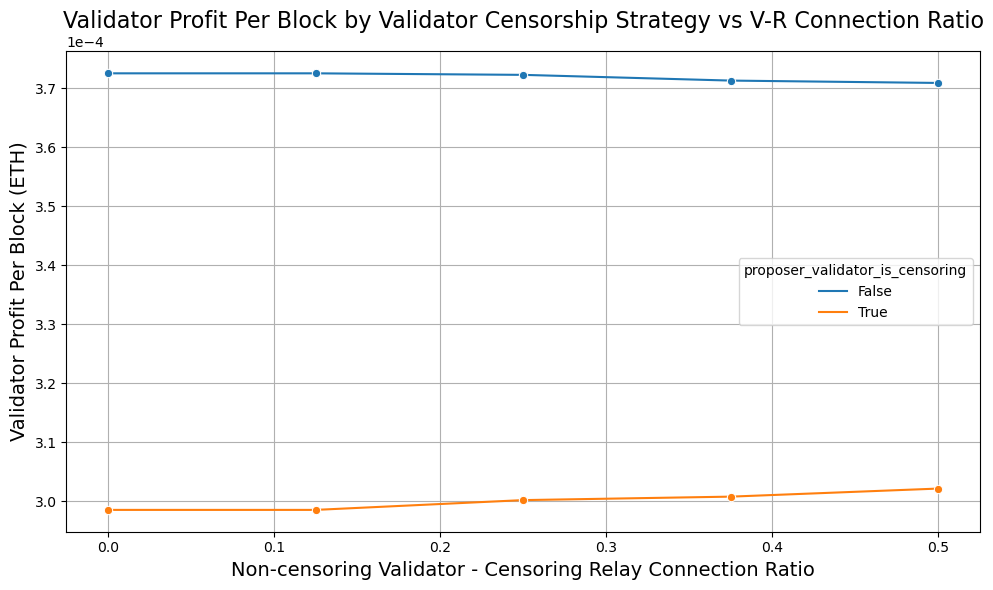

/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mac/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

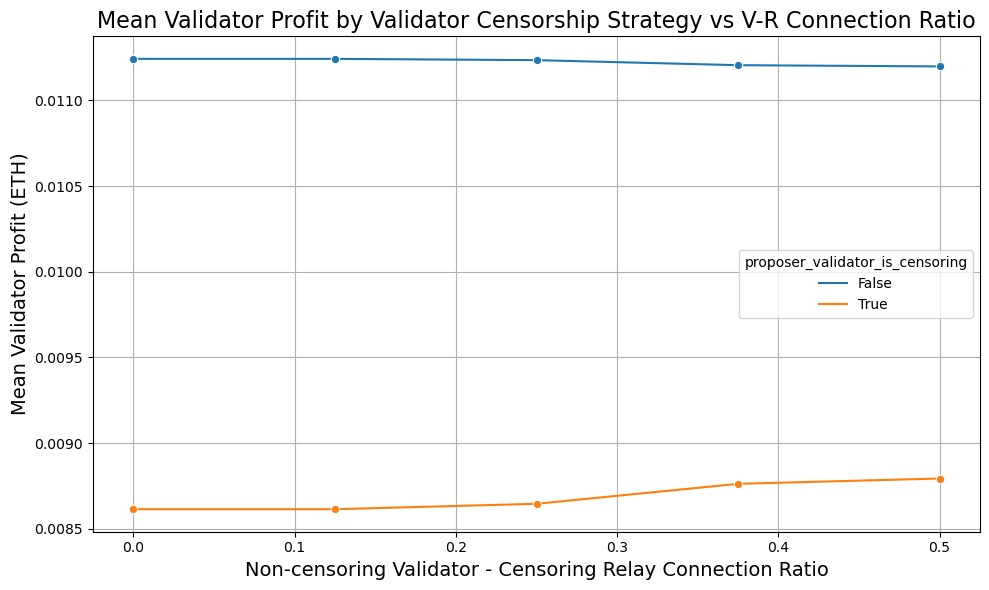

In [ ]:

base_dir = "simulation_results_SA_0504/sensitivity_censoring_br_vr_ratios_20250504_231002"


combined_transactions = pd.DataFrame()


folders = [
    f for f in os.listdir(base_dir) 
    if re.match(r"censoring_br_vr_ratios_0\.750_\d+\.\d+_", f)
]


def extract_vr_ratio(folder_name):
    match = re.search(r"censoring_br_vr_ratios_0\.750_(\d+\.\d+)_", folder_name)
    return float(match.group(1)) if match else float('inf')

folders.sort(key=extract_vr_ratio)


results = []


for folder in folders:
    vr_ratio = extract_vr_ratio(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)


    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()


    stats = calculate_validator_profit_by_policy(blocks, f'cvrr_{vr_ratio:.3f}')
    stats['vr_ratio'] = vr_ratio
    results.append(stats)


combined_stats = pd.concat(results)


print(combined_stats.sort_values(['vr_ratio', 'proposer_validator_is_censoring']))

# Figure 1: Average Validator Profit Per Block by Validator Censorship Strategy vs V-R Connection Ratio
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='vr_ratio', y='mean_validator_profit_per_block(ETH)', hue='proposer_validator_is_censoring', marker='o')
plt.xlabel('Non-censoring Validator - Censoring Relay Connection Ratio', fontsize=14)
plt.ylabel('Validator Profit Per Block (ETH)', fontsize=14)
plt.title('Validator Profit Per Block by Validator Censorship Strategy vs V-R Connection Ratio', fontsize=16)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Mean Validator Profit Per Validator by Validator Censorship Strategy vs V-R Connection Ratio
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_stats, x='vr_ratio', y='mean_validator_profit_per_validator(ETH)', hue='proposer_validator_is_censoring', marker='o')
plt.xlabel('Non-censoring Validator - Censoring Relay Connection Ratio', fontsize=14)
plt.ylabel('Mean Validator Profit (ETH)', fontsize=14)
plt.title('Mean Validator Profit by Validator Censorship Strategy vs V-R Connection Ratio', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Two factor analysis - censoring_builder_relay_ratio & censoring_validator_relay_ratio_no_censoring

#### Transaction Delay - censoring_builder_relay_ratio & censoring_validator_relay_ratio_no_censoring

In [ ]:



base_dir = "simulation_results_SA_0608/sensitivity_censoring_br_vr_ratios_20250620_113554"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("censoring_br_vr_ratios_")]


def extract_br_vr_ratios(folder_name):
    match = re.search(r"censoring_br_vr_ratios_(\d+\.\d+)_(\d+\.\d+)_", folder_name)
    if match:
        br_ratio = float(match.group(1))
        vr_ratio = float(match.group(2))
        return (br_ratio, vr_ratio)
    else:
        return (float('inf'), float('inf'))

folders.sort(key=extract_br_vr_ratios)


for folder in folders:
    br_ratio, vr_ratio = extract_br_vr_ratios(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "transactions.csv")

    transactions = pd.read_csv(file_path, low_memory=False)
    transactions = transactions[transactions['is_proposed']].copy()
    transactions['proposal_delay'] = transactions['proposed_time'] - transactions['arrival_time']
    transactions['sanctioned_type'] = transactions['sanctioned_type'].map({0: 'Non-sanctioned (0)', 1: 'Sanctioned (1)'})


    transactions['experiment'] = f"cbrr_{br_ratio:.3f}_cvrr_{vr_ratio:.3f}"
    transactions['br_ratio'] = br_ratio
    transactions['vr_ratio'] = vr_ratio

    combined_transactions = pd.concat([combined_transactions, transactions], ignore_index=True)


negative_delay_txs = combined_transactions[combined_transactions['proposal_delay'] < 0]
print("Transactions with negative proposal delay:")
print(negative_delay_txs)


run_stats = combined_transactions.groupby(['br_ratio', 'vr_ratio', 'run_id', 'sanctioned_type'])['proposal_delay'].agg(['mean', 'std']).reset_index()

final_stats = run_stats.groupby(['br_ratio', 'vr_ratio', 'sanctioned_type']).agg({
    'mean': 'mean',
    'std': 'mean'
}).reset_index()

print("\nProposal Delay Statistics by Builder-Relay and Validator-Relay Connection Ratio and Sanctioned Type (averaged by run_id):")
# print(final_stats)

pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 

display(final_stats)

Transactions with negative proposal delay:
Empty DataFrame
Columns: [run_id, tx_id, arrival_time, transaction_type, sanctioned_type, gas_used, base_fee_per_gas, priority_fee_per_gas, priority_fee, gas_fee, proposed_block_id, proposed_builder_id, proposed_builder_policy, selected_relay_id, selected_relay_policy, proposer_validator_id, proposer_validator_is_censoring, proposed_time, confirmed_time, is_proposed, is_confirmed, proposal_delay, experiment, br_ratio, vr_ratio]
Index: []

[0 rows x 25 columns]

Proposal Delay Statistics by Builder-Relay and Validator-Relay Connection Ratio and Sanctioned Type (averaged by run_id):


br_ratio  vr_ratio     sanctioned_type       mean        std
0      0.500     0.000  Non-sanctioned (0)  18.515745  25.045726
1      0.500     0.000      Sanctioned (1)  31.741112  74.196978
2      0.500     0.125  Non-sanctioned (0)  18.515745  25.045726
3      0.500     0.125      Sanctioned (1)  31.741112  74.196978
4      0.500     0.250  Non-sanctioned (0)  17.412598  16.601380
5      0.500     0.250      Sanctioned (1)  30.032944  62.858412
6      0.500     0.375  Non-sanctioned (0)  17.519402  17.018748
7      0.500     0.375      Sanctioned (1)  29.865394  61.288968
8      0.500     0.500  Non-sanctioned (0)  17.777805  19.381375
9      0.500     0.500      Sanctioned (1)  30.857878  66.454324
10     0.625     0.000  Non-sanctioned (0)  19.538525  33.111541
11     0.625     0.000      Sanctioned (1)  33.836297  80.473658
12     0.625     0.125  Non-sanctioned (0)  19.538525  33.111541
13     0.625     0.125      Sanctioned (1)  33.836297  80.473658
14     0.625     0.250  Non-sanctioned (0)  17.595826  18.230505
15     0.625     0.250      Sanctioned (1)  30.484939  65.183686
16     0.625     0.375  Non-sanctioned (0)  17.774082  18.819510
17     0.625     0.375      Sanctioned (1)  31.233343  67.933693
18     0.625     0.500  Non-sanctioned (0)  17.919542  20.887340
19     0.625     0.500      Sanctioned (1)  31.816207  67.982781
20     0.750     0.000  Non-sanctioned (0)  18.064745  21.226725
21     0.750     0.000      Sanctioned (1)  30.808477  67.076378
22     0.750     0.125  Non-sanctioned (0)  18.064745  21.226725
23     0.750     0.125      Sanctioned (1)  30.808477  67.076378
24     0.750     0.250  Non-sanctioned (0)  18.828584  28.265496
25     0.750     0.250      Sanctioned (1)  32.608681  73.826906
26     0.750     0.375  Non-sanctioned (0)  17.238723  16.456688
27     0.750     0.375      Sanctioned (1)  28.628375  60.486086
28     0.750     0.500  Non-sanctioned (0)  19.256315  30.865754
29     0.750     0.500      Sanctioned (1)  32.150141  74.551070
30     0.875     0.000  Non-sanctioned (0)  18.030715  21.485063
31     0.875     0.000      Sanctioned (1)  31.978121  76.019969
32     0.875     0.125  Non-sanctioned (0)  18.030715  21.485063
33     0.875     0.125      Sanctioned (1)  31.978121  76.019969
34     0.875     0.250  Non-sanctioned (0)  18.955901  28.708571
35     0.875     0.250      Sanctioned (1)  31.822854  73.109548
36     0.875     0.375  Non-sanctioned (0)  19.432886  32.585059
37     0.875     0.375      Sanctioned (1)  34.023842  81.494065
38     0.875     0.500  Non-sanctioned (0)  17.539557  17.610361
39     0.875     0.500      Sanctioned (1)  30.226755  69.337553
40     1.000     0.000  Non-sanctioned (0)  19.033798  27.981932
41     1.000     0.000      Sanctioned (1)  30.048762  72.575559
42     1.000     0.125  Non-sanctioned (0)  19.033798  27.981932
43     1.000     0.125      Sanctioned (1)  30.048762  72.575559
44     1.000     0.250  Non-sanctioned (0)  19.049355  29.406793
45     1.000     0.250      Sanctioned (1)  30.585054  72.360813
46     1.000     0.375  Non-sanctioned (0)  18.663731  23.685348
47     1.000     0.375      Sanctioned (1)  28.998208  64.118313
48     1.000     0.500  Non-sanctioned (0)  18.885675  26.629134
49     1.000     0.500      Sanctioned (1)  29.524693  66.448153

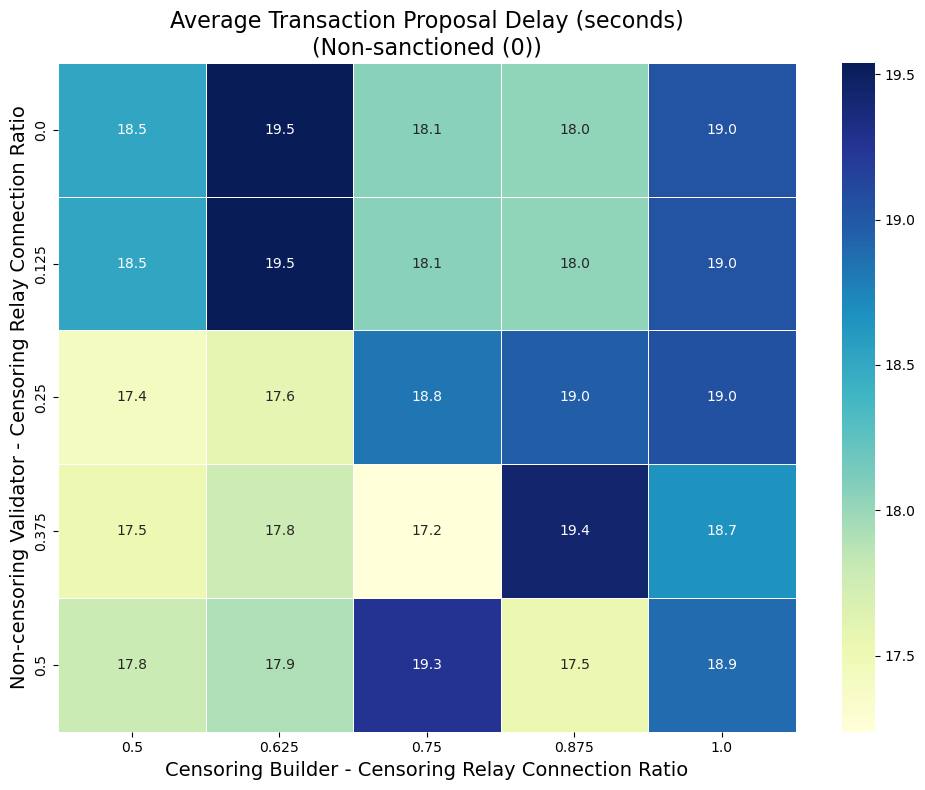

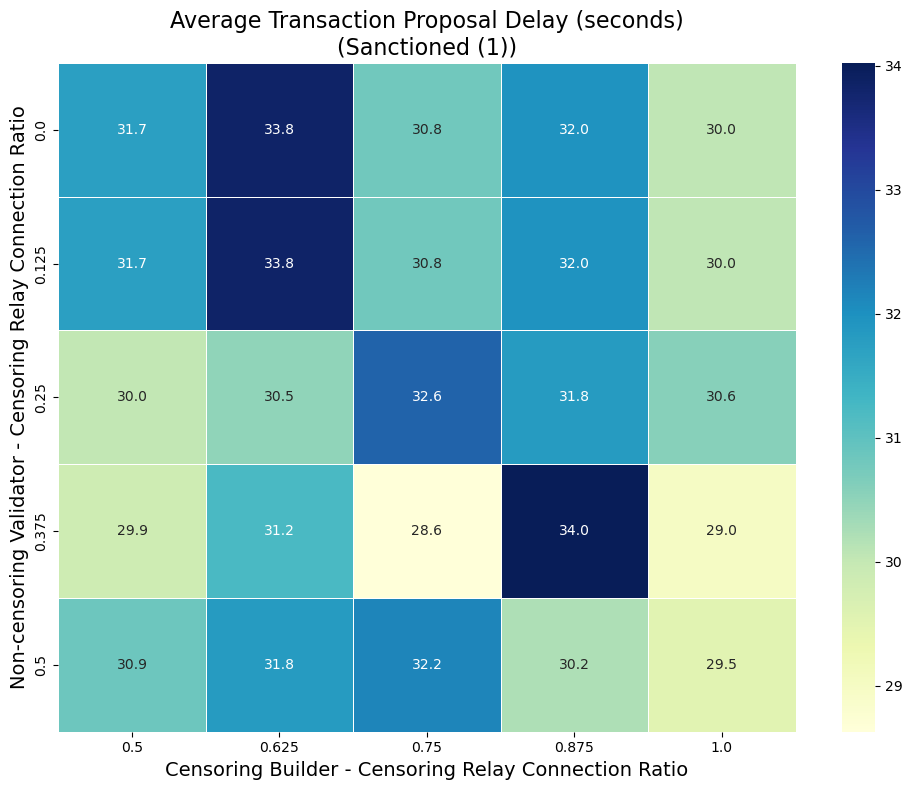

In [ ]:

full_vr_ratios = sorted(final_stats['vr_ratio'].unique())
full_br_ratios = sorted(final_stats['br_ratio'].unique())

for sanctioned_type in final_stats['sanctioned_type'].unique():
    subset = final_stats[final_stats['sanctioned_type'] == sanctioned_type]

    heatmap_data = subset.pivot(index='vr_ratio', columns='br_ratio', values='mean').reindex(index=full_vr_ratios, columns=full_br_ratios)

    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(
        heatmap_data,
        annot=True,
        fmt=".1f",
        cmap="YlGnBu",
        linewidths=.5,
        # cbar_kws={'label': 'Mean Proposal Delay (s)'},
        mask=heatmap_data.isnull(),  
    )


    for i in range(heatmap_data.shape[0]):
        for j in range(heatmap_data.shape[1]):
            if pd.isna(heatmap_data.iloc[i, j]):
                ax.text(
                    j + 0.5, i + 0.5, 'N/A',
                    ha='center', va='center', color='grey'
                )


    # ax.invert_yaxis()

    plt.title(f'Average Transaction Proposal Delay (seconds)\n({sanctioned_type})', fontsize=16)
    plt.xlabel('Censoring Builder - Censoring Relay Connection Ratio', fontsize=14)
    plt.ylabel('Non-censoring Validator - Censoring Relay Connection Ratio', fontsize=14)
    
    plt.tight_layout()
    plt.show()


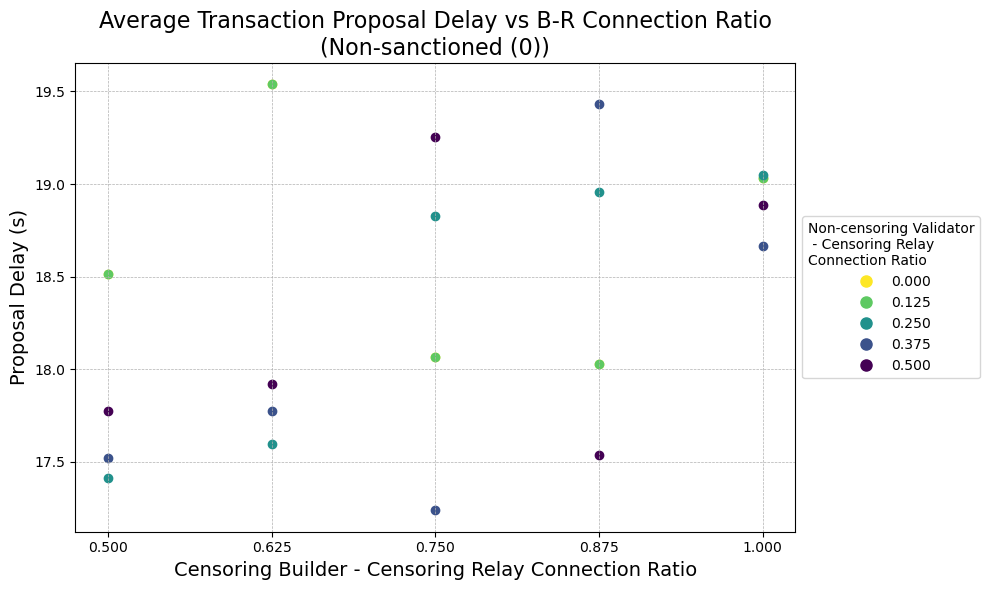

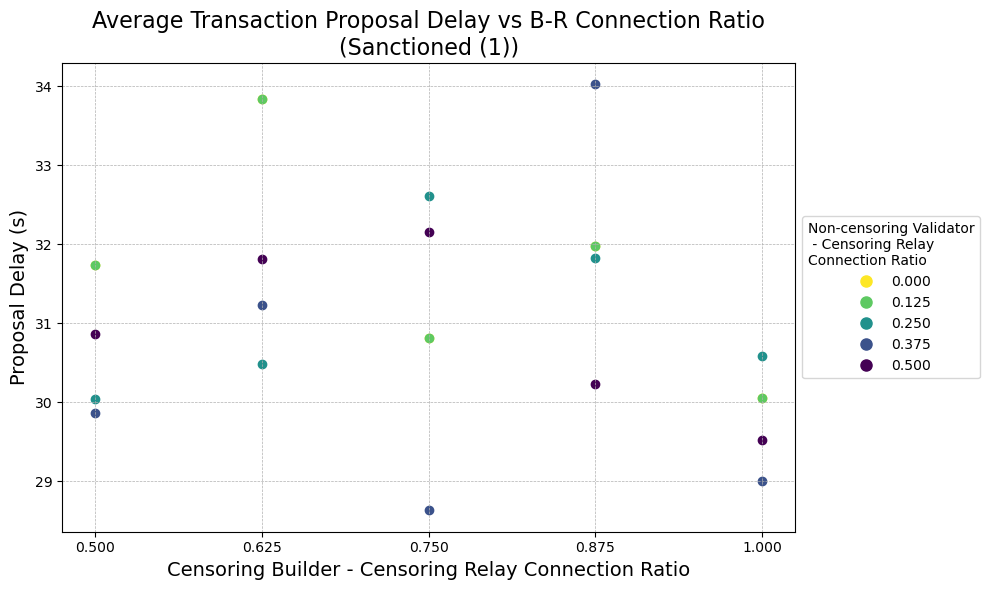

In [ ]:


vr_ratio_values = sorted(final_stats['vr_ratio'].unique())
colors = plt.cm.viridis(np.linspace(1, 0, len(vr_ratio_values)))  

for sanctioned_type in final_stats['sanctioned_type'].unique():
    subset = final_stats[final_stats['sanctioned_type'] == sanctioned_type]

    fig, ax = plt.subplots(figsize=(10, 6))

 
    unique_br_ratios = sorted(subset['br_ratio'].unique())
    br_ratio_to_pos = {ratio: pos for pos, ratio in enumerate(unique_br_ratios)}


    for i, vr_ratio in enumerate(vr_ratio_values):
        data = subset[subset['vr_ratio'] == vr_ratio]
        positions = [br_ratio_to_pos[bt] for bt in data['br_ratio']]
        ax.scatter(positions, data['mean'],
                   color=colors[i], marker='o', label=f'{vr_ratio:.3f}', alpha=1.0)

    ax.set_xlabel('Censoring Builder - Censoring Relay Connection Ratio', fontsize=14)
    ax.set_ylabel('Proposal Delay (s)', fontsize=14)
    ax.grid(True, linestyle='--', linewidth=0.5)

    
    ax.set_xticks(range(len(unique_br_ratios)))
    ax.set_xticklabels([f'{x:.3f}' for x in unique_br_ratios])

    
    legend_elements = [plt.Line2D([0], [0], marker='o', color=colors[i], linestyle='', markersize=8, label=f'{vr_ratio:.3f}')
                       for i, vr_ratio in enumerate(vr_ratio_values)]
    ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), title='Non-censoring Validator\n - Censoring Relay\nConnection Ratio')

    plt.title(f'Average Transaction Proposal Delay vs B-R Connection Ratio\n({sanctioned_type})', fontsize=16)
    plt.tight_layout()
    plt.show()

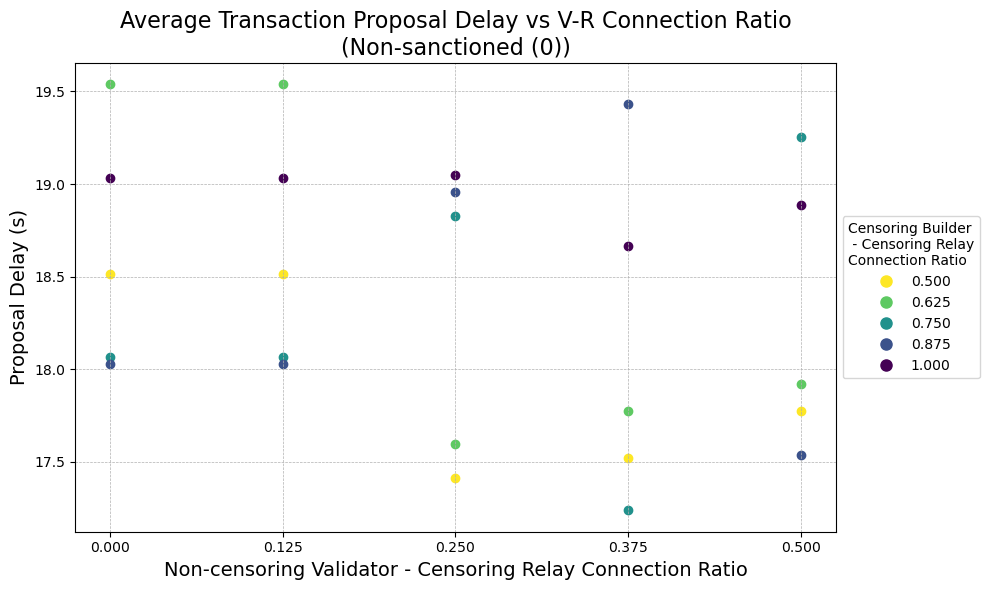

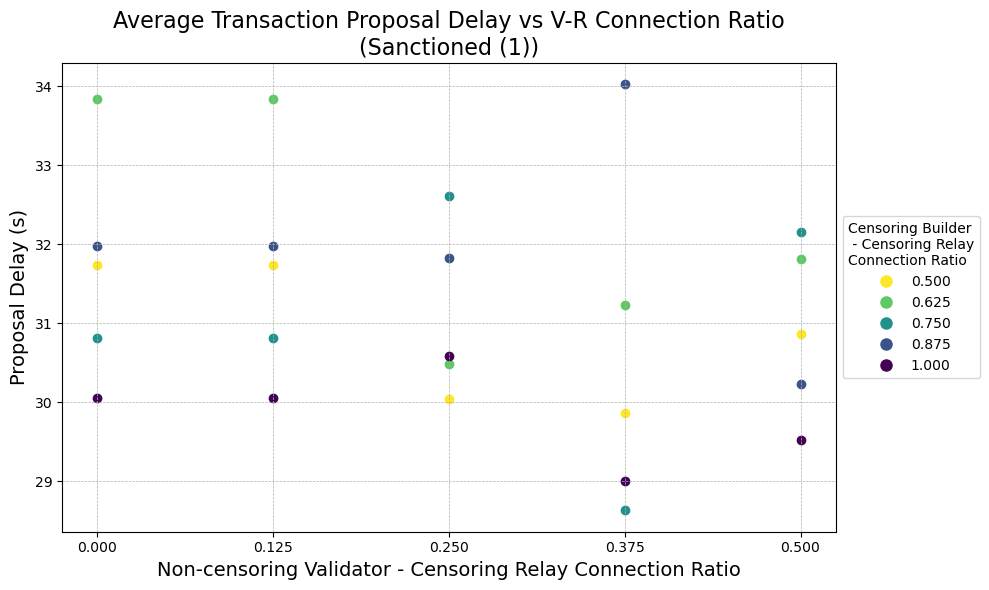

In [ ]:


br_ratio_values = sorted(final_stats['br_ratio'].unique())
colors = plt.cm.viridis(np.linspace(1, 0, len(br_ratio_values)))  

for sanctioned_type in final_stats['sanctioned_type'].unique():
    subset = final_stats[final_stats['sanctioned_type'] == sanctioned_type]

    fig, ax = plt.subplots(figsize=(10, 6))


    unique_vr_ratios = sorted(subset['vr_ratio'].unique())
    vr_ratio_to_pos = {ratio: pos for pos, ratio in enumerate(unique_vr_ratios)}


    for i, br_ratio in enumerate(br_ratio_values):
        data = subset[subset['br_ratio'] == br_ratio]
        positions = [vr_ratio_to_pos[rt] for rt in data['vr_ratio']]
        ax.scatter(positions, data['mean'],
                   color=colors[i], marker='o', label=f'{br_ratio:.3f}', alpha=1.0)

    ax.set_xlabel('Non-censoring Validator - Censoring Relay Connection Ratio', fontsize=14)
    ax.set_ylabel('Proposal Delay (s)', fontsize=14)
    ax.grid(True, linestyle='--', linewidth=0.5)

  
    ax.set_xticks(range(len(unique_vr_ratios)))
    ax.set_xticklabels([f'{x:.3f}' for x in unique_vr_ratios])

  
    legend_elements = [plt.Line2D([0], [0], marker='o', color=colors[i], linestyle='', markersize=8, label=f'{br_ratio:.3f}')
                       for i, br_ratio in enumerate(br_ratio_values)]
    ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), title='Censoring Builder\n - Censoring Relay\nConnection Ratio')

    plt.title(f'Average Transaction Proposal Delay vs V-R Connection Ratio\n({sanctioned_type})', fontsize=16)
    plt.tight_layout()
    plt.show()


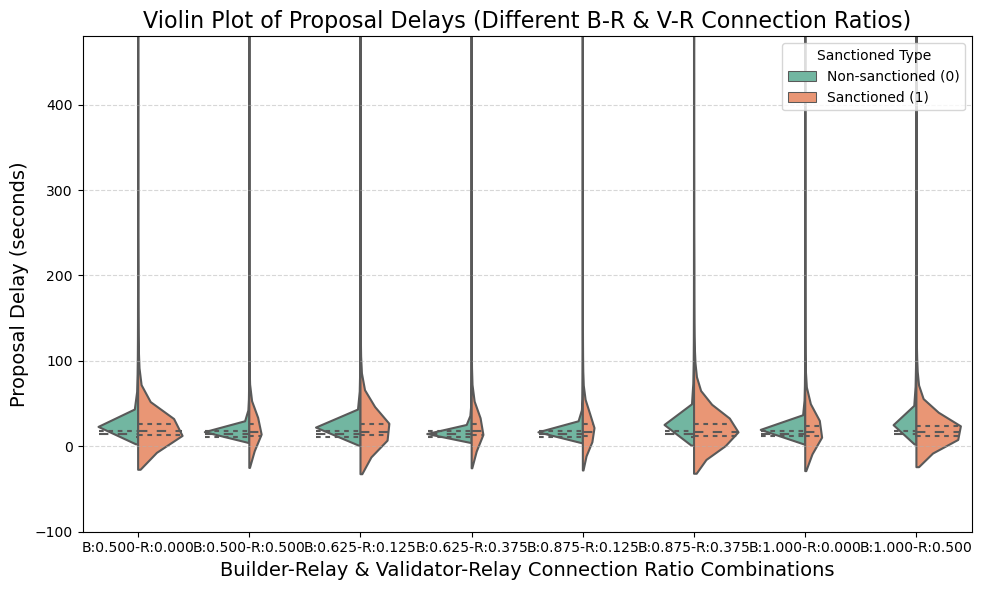

In [ ]:

diff_ratios = [
    (0.5, 0.5),
    (0.625, 0.375),
    (0.875, 0.125),
    (1.0, 0.0),
    (0.5, 0.0),
    (0.625, 0.125),
    (0.875, 0.375),
    (1.0, 0.5)
]

selected_data = combined_transactions[
    combined_transactions.apply(
        lambda row: (row['br_ratio'], row['vr_ratio']) in diff_ratios, axis=1
    )
].copy()


selected_data['ratio_label'] = selected_data.apply(
    lambda row: f"B:{row['br_ratio']:.3f}-R:{row['vr_ratio']:.3f}", axis=1
)

plt.figure(figsize=(10, 6))

sns.violinplot(
    data=selected_data,
    x='ratio_label',
    y='proposal_delay',
    hue='sanctioned_type',
    split=True,
    inner='quartile',
    palette='Set2',
    clip=(0, 480),
)

plt.ylim(-100, 480)
plt.xlabel('Builder-Relay & Validator-Relay Connection Ratio Combinations', fontsize=14)
plt.ylabel('Proposal Delay (seconds)', fontsize=14)
plt.title('Violin Plot of Proposal Delays (Different B-R & V-R Connection Ratios)', fontsize=16)

plt.legend(title='Sanctioned Type', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


#### The number/proportion of blocks containing sanctioned transactions
#### The number/proportion of empty blocks
####  -  censoring_builder_relay_ratio & censoring_validator_relay_ratio_no_censoring

In [ ]:


base_dir = "simulation_results_SA_0608/sensitivity_censoring_br_vr_ratios_20250620_113554"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("censoring_br_vr_ratios_")]


def extract_br_vr_ratios(folder_name):
    match = re.search(r"censoring_br_vr_ratios_(\d+\.\d+)_(\d+\.\d+)_", folder_name)
    if match:
        br_ratio = float(match.group(1))
        vr_ratio = float(match.group(2))
        return (br_ratio, vr_ratio)
    else:
        return (float('inf'), float('inf'))

folders.sort(key=extract_br_vr_ratios)


results = []

for folder in folders:
    br_ratio, vr_ratio = extract_br_vr_ratios(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)

    run_ids = blocks['run_id'].unique()


    run_metrics = []

    for run in run_ids:
        run_blocks = blocks[blocks['run_id'] == run]

        non_empty_blocks = run_blocks[(run_blocks['is_proposed']) & (run_blocks['builder_id'] != 'PROPOSER')].copy()
        non_empty_blocks['contains_sanctioned'] = non_empty_blocks['num_sanctioned_tx'] > 0

        blocks_with_sanctioned = non_empty_blocks['contains_sanctioned'].sum()
        blocks_without_sanctioned = (~non_empty_blocks['contains_sanctioned']).sum()
        total_non_empty_blocks = len(non_empty_blocks)

        empty_blocks = run_blocks[(run_blocks['is_proposed']) & (run_blocks['builder_id'] == 'PROPOSER')]
        total_empty_blocks = empty_blocks.shape[0]
        total_proposed_blocks = total_non_empty_blocks + total_empty_blocks

   
        ratio_with_sanctioned = blocks_with_sanctioned / total_non_empty_blocks if total_non_empty_blocks > 0 else 0
        ratio_without_sanctioned = blocks_without_sanctioned / total_non_empty_blocks if total_non_empty_blocks > 0 else 0
        empty_block_ratio = total_empty_blocks / total_proposed_blocks if total_proposed_blocks > 0 else 0

        run_metrics.append({
            'blocks_with_sanctioned': blocks_with_sanctioned,
            'blocks_without_sanctioned': blocks_without_sanctioned,
            'empty_blocks': total_empty_blocks,
            'ratio_with_sanctioned': ratio_with_sanctioned,
            'ratio_without_sanctioned': ratio_without_sanctioned,
            'empty_block_ratio': empty_block_ratio
        })


    metrics_df = pd.DataFrame(run_metrics)

    results.append({
        'br_ratio': br_ratio,
        'vr_ratio': vr_ratio,
        'avg_blocks_with_sanctioned': metrics_df['blocks_with_sanctioned'].mean(),
        'avg_blocks_without_sanctioned': metrics_df['blocks_without_sanctioned'].mean(),
        'ratio_with_sanctioned': metrics_df['ratio_with_sanctioned'].mean(),
        'ratio_without_sanctioned': metrics_df['ratio_without_sanctioned'].mean(),
        'avg_empty_blocks': metrics_df['empty_blocks'].mean(),
        'empty_block_ratio': metrics_df['empty_block_ratio'].mean()
    })

    print(f"\nExperiment: cbrr_{br_ratio:.3f}_cvrr_{vr_ratio:.3f}")
    print(f"平均含 sanctioned_type=1 交易的区块数量: {metrics_df['blocks_with_sanctioned'].mean():.6f}")
    print(f"平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: {metrics_df['blocks_without_sanctioned'].mean():.6f}")
    print(f"含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: {metrics_df['ratio_with_sanctioned'].mean():.2%}")
    print(f"不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: {metrics_df['ratio_without_sanctioned'].mean():.2%}")
    print(f"平均空区块数量: {metrics_df['empty_blocks'].mean():.6f}")
    print(f"空区块占所有已提议区块的比例: {metrics_df['empty_block_ratio'].mean():.2%}")


Experiment: cbrr_0.500_cvrr_0.000
平均含 sanctioned_type=1 交易的区块数量: 137.700000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 161.300000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 46.06%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 53.94%
平均空区块数量: 1.000000
空区块占所有已提议区块的比例: 0.33%

Experiment: cbrr_0.500_cvrr_0.125
平均含 sanctioned_type=1 交易的区块数量: 137.700000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 161.300000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 46.06%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 53.94%
平均空区块数量: 1.000000
空区块占所有已提议区块的比例: 0.33%

Experiment: cbrr_0.500_cvrr_0.250
平均含 sanctioned_type=1 交易的区块数量: 137.100000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 162.500000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 45.76%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 54.24%
平均空区块数量: 0.400000
空区块占所有已提议区块的比例: 0.13%

Experiment: cbrr_0.500_cvrr_0.375
平均含 sanctioned_type=1 交易的区块数量: 137.900000
平均不含 sanctioned_type=1 交易的区块数量（不含空区块）: 161.800000
含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例: 46.01%
不含 sanctioned_type=1 交易的区块占所有已提议非空区块的比例:

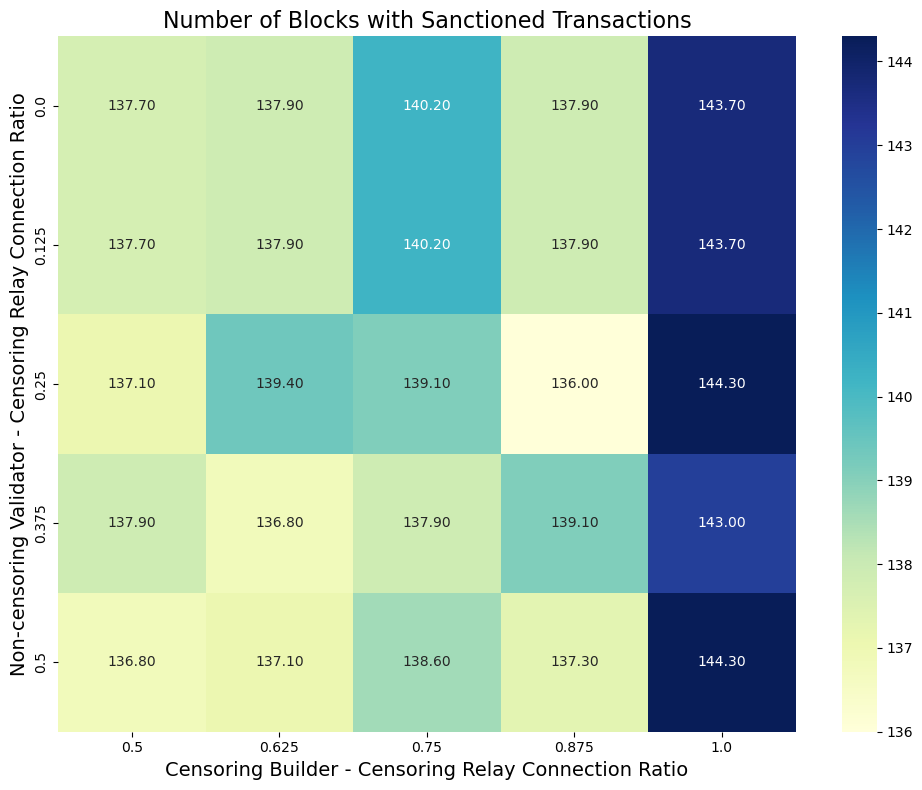

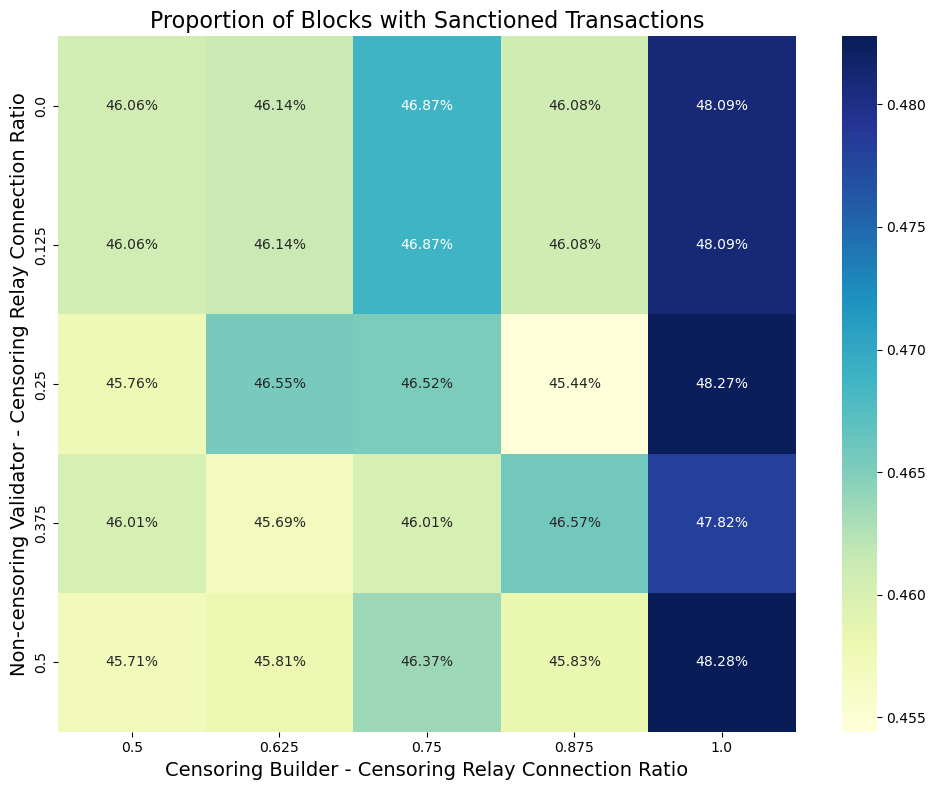

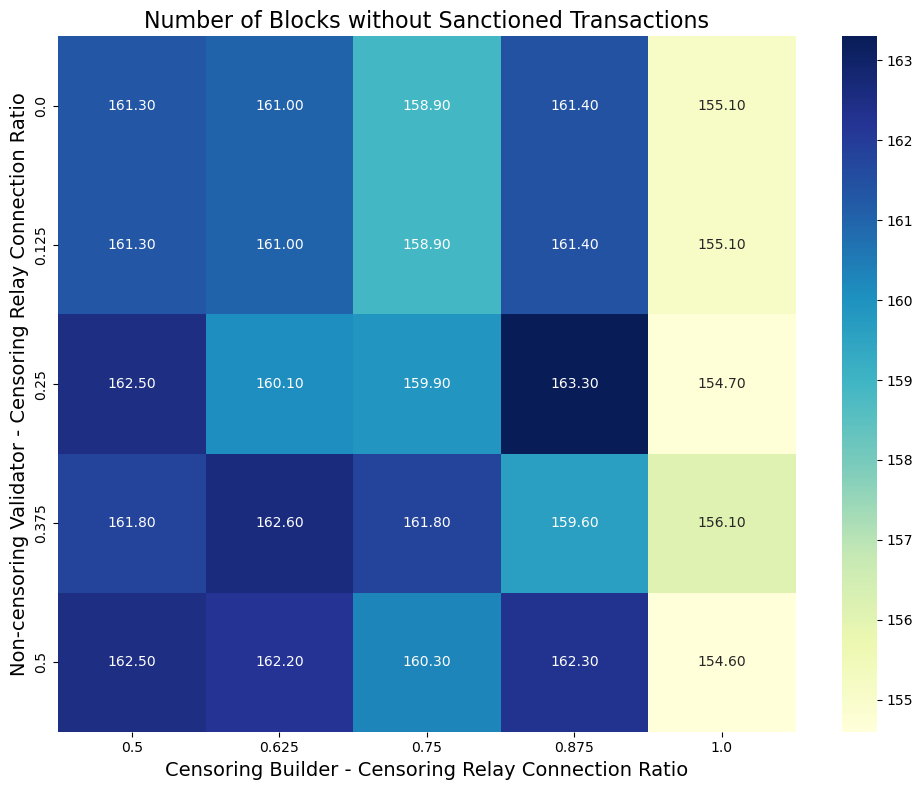

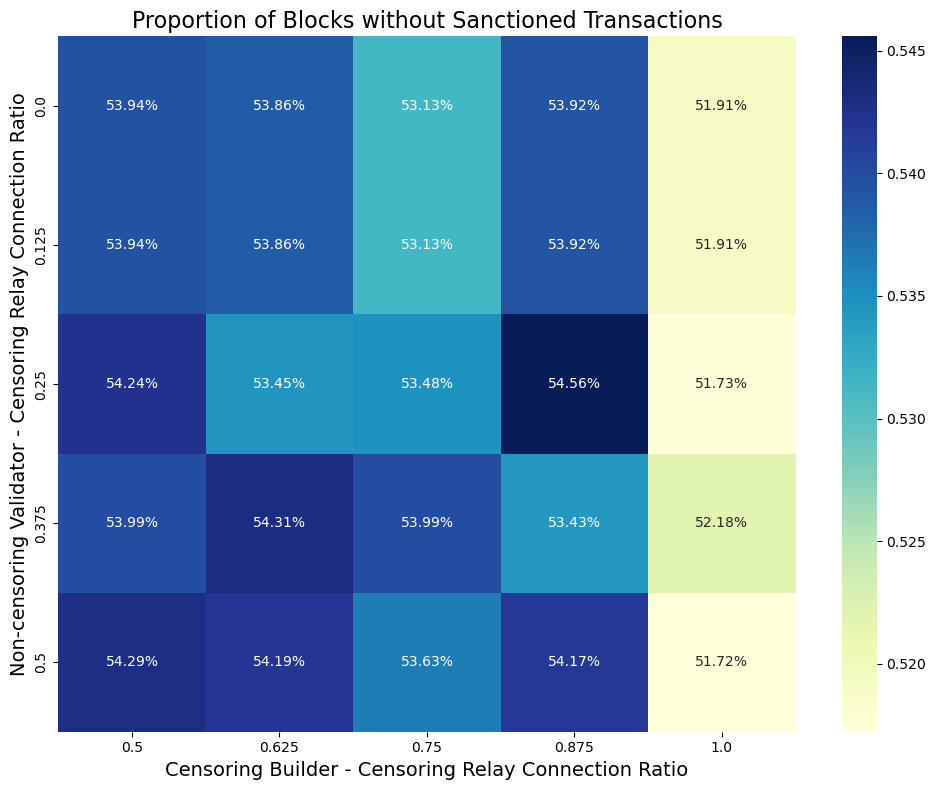

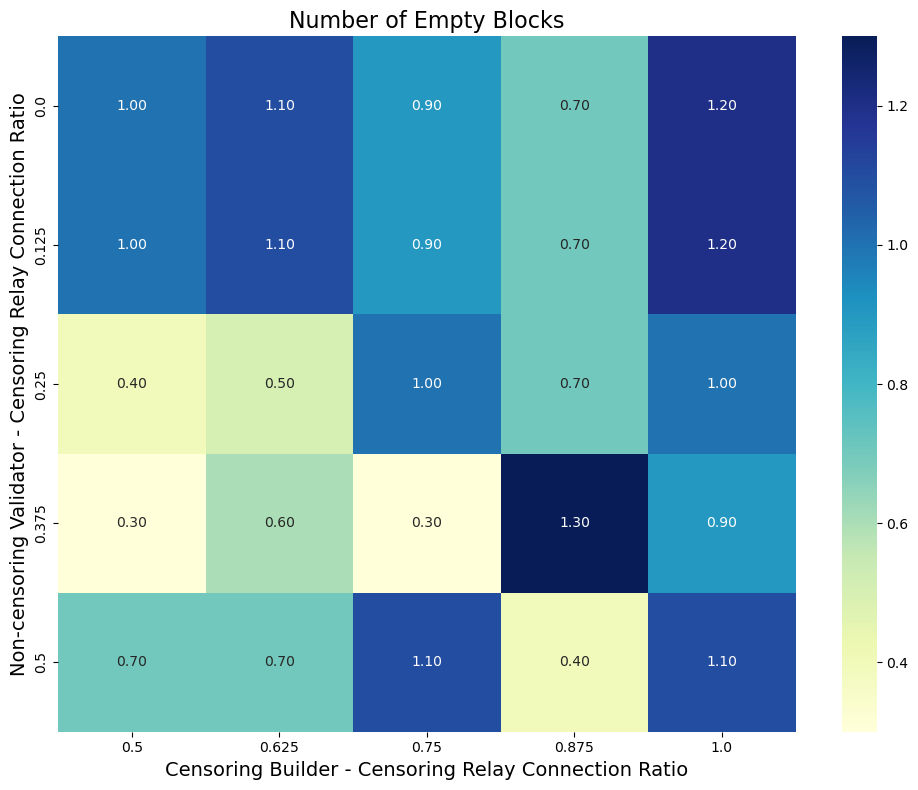

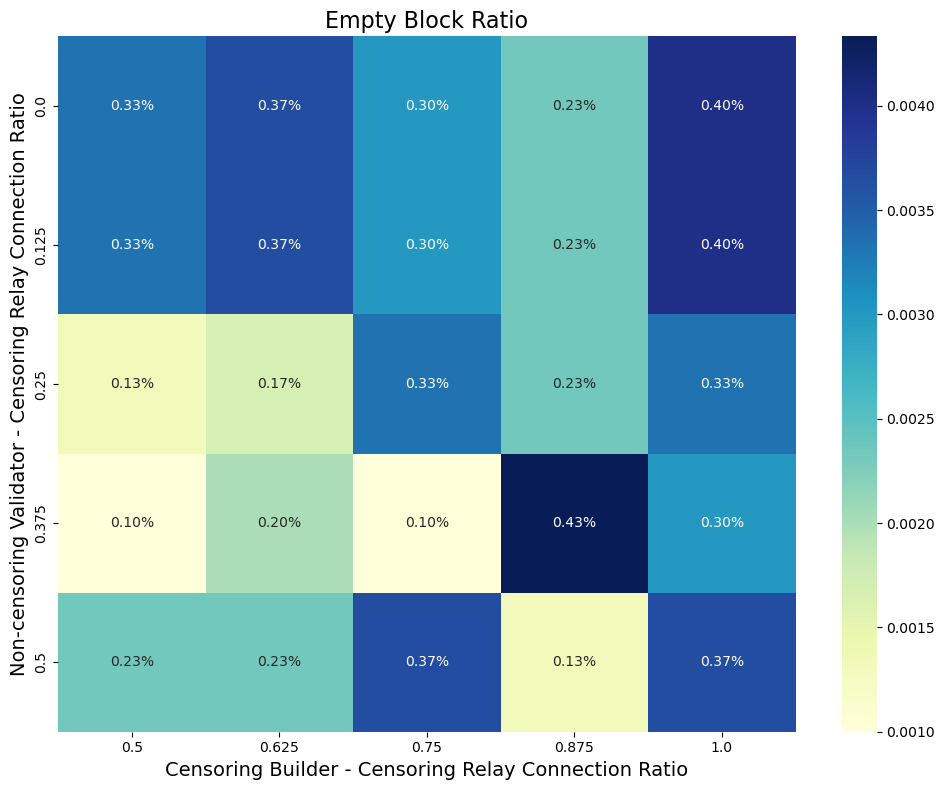

In [ ]:

results_df = pd.DataFrame(results)


def plot_heatmap(data, title, fmt):
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(data, annot=True, fmt=fmt, cmap="YlGnBu")
    # ax.invert_yaxis()  
    plt.xlabel('Censoring Builder - Censoring Relay Connection Ratio', fontsize=14)
    plt.ylabel('Non-censoring Validator - Censoring Relay Connection Ratio', fontsize=14)
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Figure 1: Heatmap of average number of blocks with sanctioned transactions
heatmap_data_1 = results_df.pivot(index='vr_ratio', columns='br_ratio', values='avg_blocks_with_sanctioned')
plot_heatmap(heatmap_data_1, 'Number of Blocks with Sanctioned Transactions', ".2f")

# Figure 2: Heatmap of proportion of blocks with sanctioned transactions
heatmap_data_2 = results_df.pivot(index='vr_ratio', columns='br_ratio', values='ratio_with_sanctioned')
plot_heatmap(heatmap_data_2, 'Proportion of Blocks with Sanctioned Transactions', ".2%")

# Figure 3: Heatmap of average number of blocks without sanctioned transactions
heatmap_data_5 = results_df.pivot(index='vr_ratio', columns='br_ratio', values='avg_blocks_without_sanctioned')
plot_heatmap(heatmap_data_5, 'Number of Blocks without Sanctioned Transactions', ".2f")

# Figure 4: Heatmap of proportion of blocks without sanctioned transactions
heatmap_data_6 = results_df.pivot(index='vr_ratio', columns='br_ratio', values='ratio_without_sanctioned')
plot_heatmap(heatmap_data_6, 'Proportion of Blocks without Sanctioned Transactions', ".2%")

# Figure 5: Average number of empty blocks heatmap
heatmap_data_3 = results_df.pivot(index='vr_ratio', columns='br_ratio', values='avg_empty_blocks')
plot_heatmap(heatmap_data_3, 'Number of Empty Blocks', ".2f")

# Figure 6: Empty block ratio heatmap
heatmap_data_4 = results_df.pivot(index='vr_ratio', columns='br_ratio', values='empty_block_ratio')
plot_heatmap(heatmap_data_4, 'Empty Block Ratio', ".2%")



#### Total block value and mean block value    - censoring_builder_relay_ratio & censoring_validator_relay_ratio_no_censoring

In [ ]:


def calculate_block_value_stats(exp_blocks, br_ratio, vr_ratio):
    run_summary = exp_blocks.groupby('run_id').agg(
        total_block_value=('total_priority_fee', 'sum'),
        num_blocks=('block_id', 'count')
    ).reset_index()

    run_summary['mean_block_value'] = run_summary['total_block_value'] / run_summary['num_blocks']

    avg_total_block_value = run_summary['total_block_value'].mean()
    avg_mean_block_value = run_summary['mean_block_value'].mean()

    avg_total_block_value_eth = avg_total_block_value * 1e-9
    avg_mean_block_value_eth = avg_mean_block_value * 1e-9

    return {
        'br_ratio': br_ratio,
        'vr_ratio': vr_ratio,
        'avg_total_block_value_eth': avg_total_block_value_eth,
        'avg_mean_block_value_eth': avg_mean_block_value_eth
    }

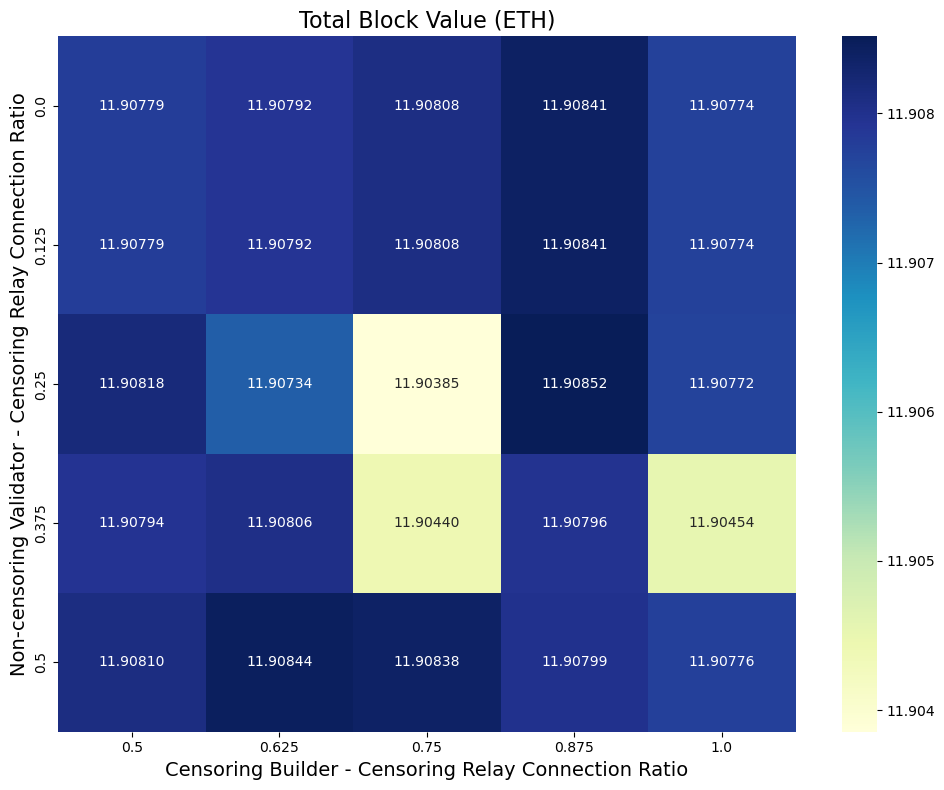

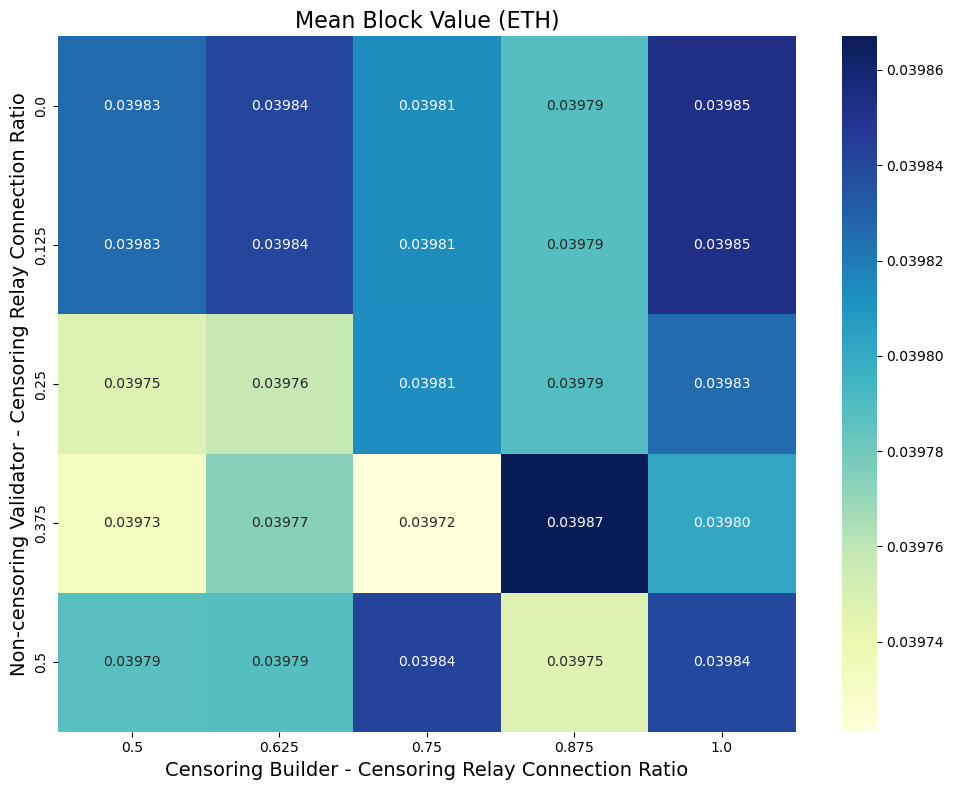

In [ ]:

base_dir = "simulation_results_SA_0608/sensitivity_censoring_br_vr_ratios_20250620_113554"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("censoring_br_vr_ratios_")]


def extract_br_vr_ratios(folder_name):
    match = re.search(r"censoring_br_vr_ratios_(\d+\.\d+)_(\d+\.\d+)_", folder_name)
    if match:
        br_ratio = float(match.group(1))
        vr_ratio = float(match.group(2))
        return (br_ratio, vr_ratio)
    else:
        return (float('inf'), float('inf'))

folders.sort(key=extract_br_vr_ratios)


results = []


for folder in folders:
    br_ratio, vr_ratio = extract_br_vr_ratios(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)


    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()

    stats = calculate_block_value_stats(blocks, br_ratio, vr_ratio)
    results.append(stats)

combined_stats = pd.DataFrame(results)


def plot_heatmap(df, value_col, title, fmt=".5f"):
    pivot_df = df.pivot(index='vr_ratio', columns='br_ratio', values=value_col)

    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(pivot_df, annot=True, fmt=fmt, cmap="YlGnBu",
                     annot_kws={"fontsize": 10}, cbar_kws={'format':ScalarFormatter(useOffset=False)})

    plt.xlabel('Censoring Builder - Censoring Relay Connection Ratio', fontsize=14)
    plt.ylabel('Non-censoring Validator - Censoring Relay Connection Ratio', fontsize=14)
    plt.title(title, fontsize=16)
    # plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


plot_heatmap(
    combined_stats,
    'avg_total_block_value_eth',
    'Total Block Value (ETH)'
)


plot_heatmap(
    combined_stats,
    'avg_mean_block_value_eth',
    'Mean Block Value (ETH)'
)


#### Average profit (per block & pre node) for builders under different censorship types  - censoring_builder_relay_ratio & censoring_validator_relay_ratio_no_censoring

In [ ]:

def calculate_builder_profit_by_policy(exp_blocks, experiment_name):

    policy_summary = exp_blocks.groupby(['run_id', 'builder_policy']).agg(
        total_builder_profit=('builder_profit', 'sum'),
        num_blocks=('block_id', 'count'),
        num_builders=('builder_id', pd.Series.nunique)
    ).reset_index()

    all_run_ids = exp_blocks['run_id'].unique()
    total_runs = len(all_run_ids)

    all_policies = ['strict', 'weak', 'non']
    full_index = pd.MultiIndex.from_product([all_run_ids, all_policies], names=['run_id', 'builder_policy'])

    policy_summary = policy_summary.set_index(['run_id', 'builder_policy']).reindex(
        full_index, fill_value=0
    ).reset_index()


    policy_summary['mean_profit_per_block'] = policy_summary.apply(
        lambda row: row['total_builder_profit'] / row['num_blocks'] if row['num_blocks'] > 0 else 0, axis=1
    )
    
    policy_summary['mean_profit_per_builder'] = policy_summary.apply(
        lambda row: row['total_builder_profit'] / row['num_builders'] if row['num_builders'] > 0 else 0, axis=1
    )


    final_policy_avg = policy_summary.groupby('builder_policy').agg({
        'mean_profit_per_block': 'mean',
        'mean_profit_per_builder': 'mean'
    }).reset_index()


    final_policy_avg['mean_builder_profit_per_block(ETH)'] = final_policy_avg['mean_profit_per_block'] * 1e-9
    final_policy_avg['mean_builder_profit_per_builder(ETH)'] = final_policy_avg['mean_profit_per_builder'] * 1e-9

    final_policy_avg['experiment'] = experiment_name

    return final_policy_avg[[
        'builder_policy',
        'mean_builder_profit_per_block(ETH)',
        'mean_builder_profit_per_builder(ETH)',
        'experiment'
    ]]


   builder_policy  mean_builder_profit_per_block(ETH)  \
0             non                            0.002042   
1          strict                            0.001798   
2            weak                            0.002026   
3             non                            0.002042   
4          strict                            0.001798   
5            weak                            0.002026   
6             non                            0.002043   
7          strict                            0.001790   
8            weak                            0.002042   
9             non                            0.002038   
10         strict                            0.001799   
11           weak                            0.002027   
12            non                            0.002046   
13         strict                            0.001792   
14           weak                            0.002023   
15            non                            0.002045   
16         strict              

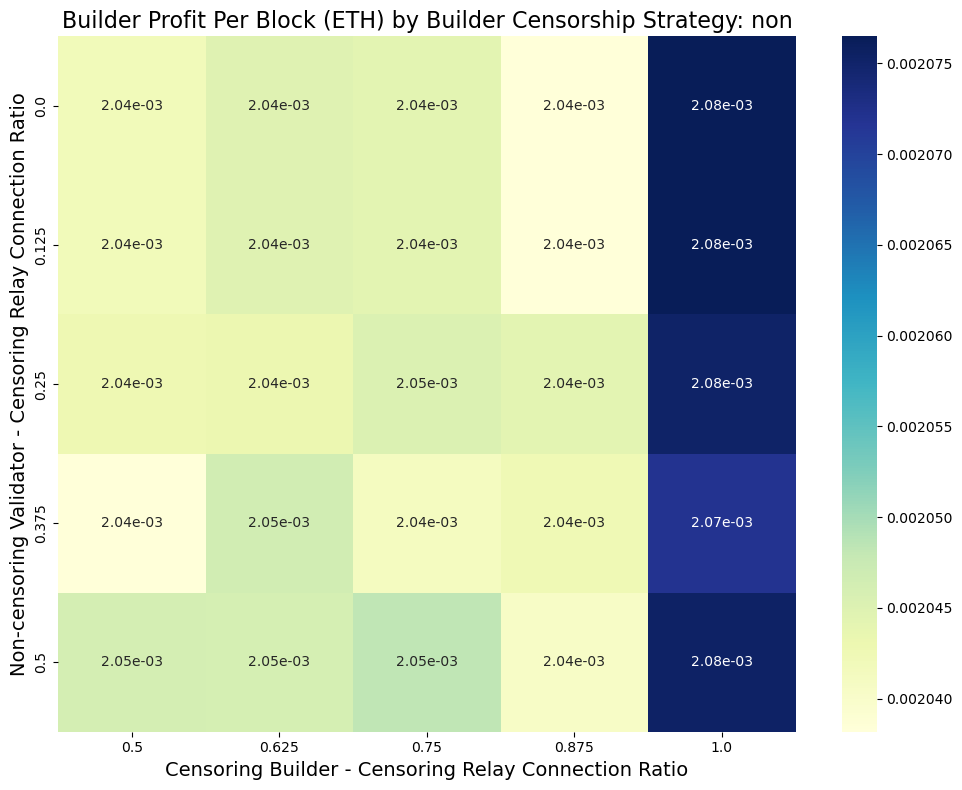

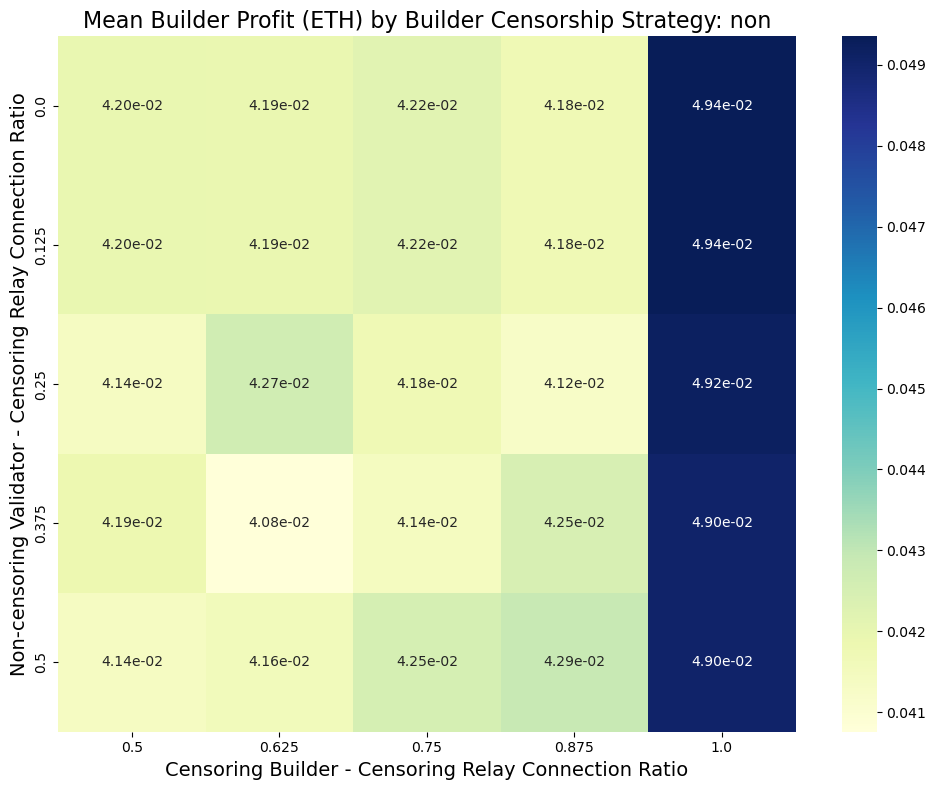

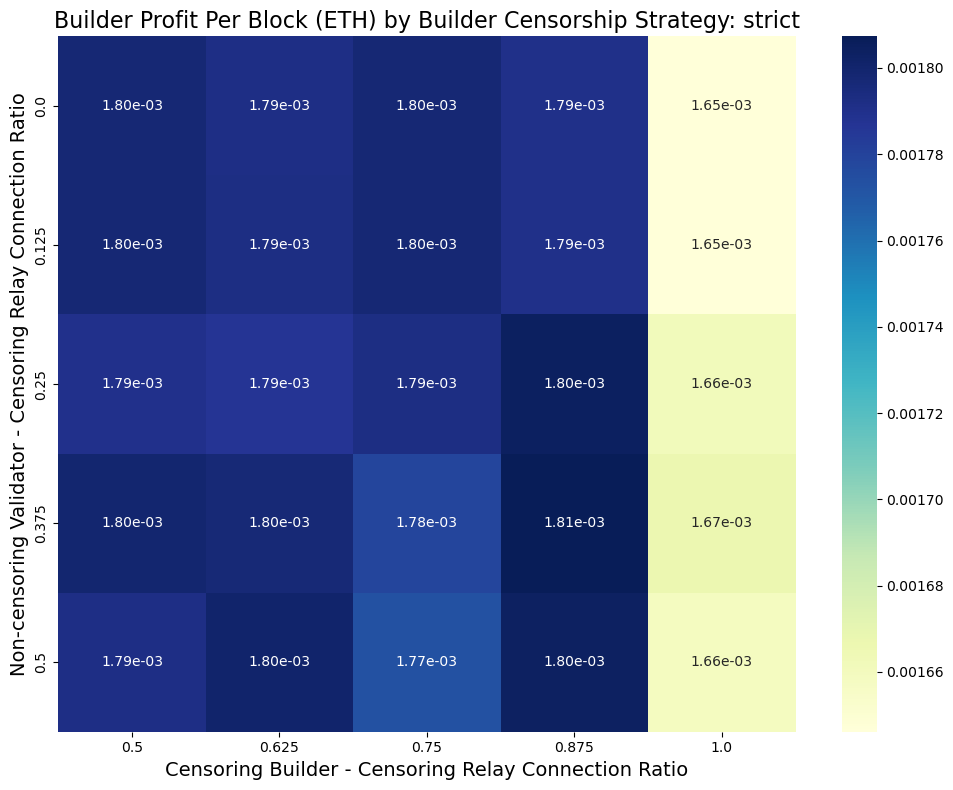

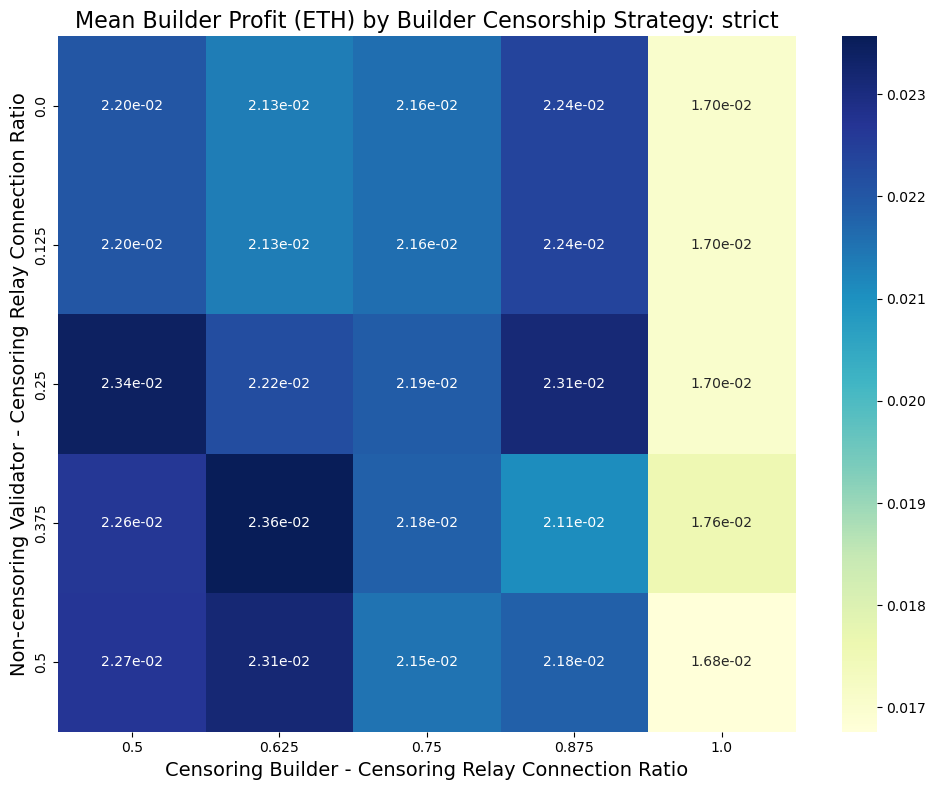

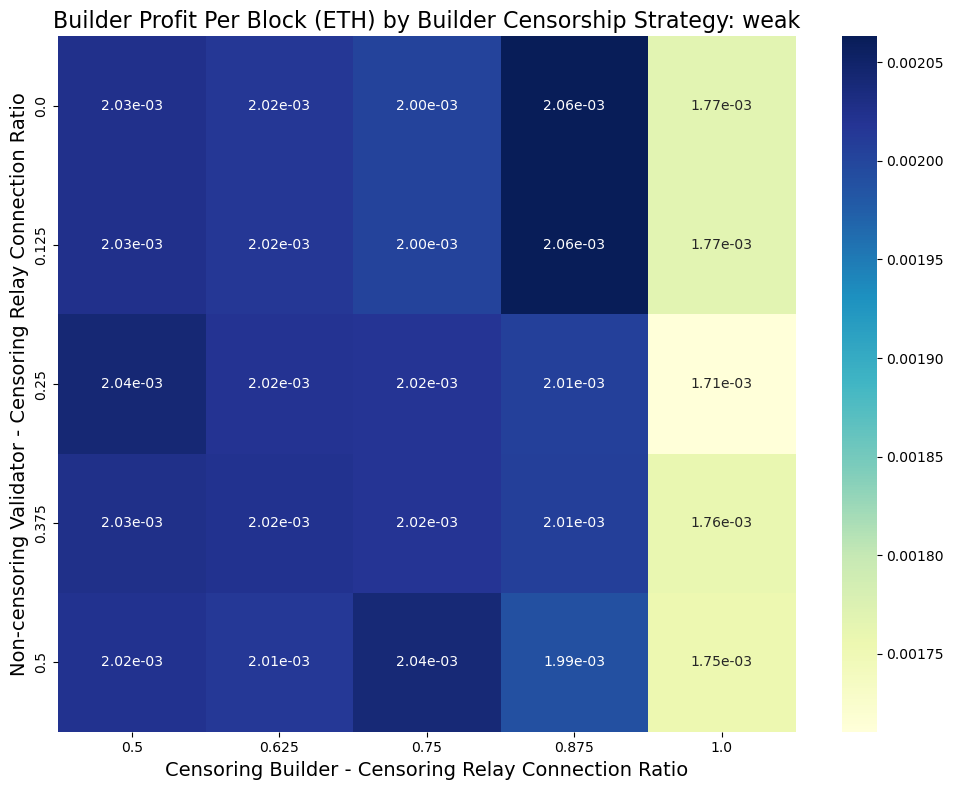

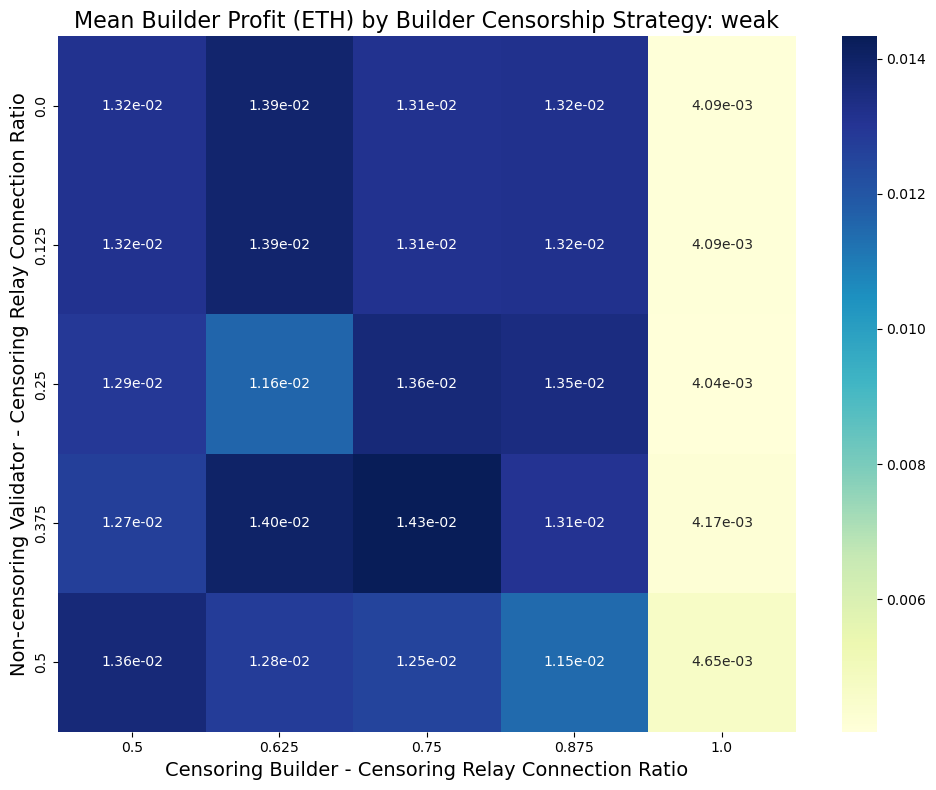

In [ ]:

base_dir = "simulation_results_SA_0608/sensitivity_censoring_br_vr_ratios_20250620_113554"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("censoring_br_vr_ratios_")]


def extract_br_vr_ratios(folder_name):
    match = re.search(r"censoring_br_vr_ratios_(\d+\.\d+)_(\d+\.\d+)_", folder_name)
    if match:
        br_ratio = float(match.group(1))
        vr_ratio = float(match.group(2))
        return (br_ratio, vr_ratio)
    else:
        return (float('inf'), float('inf'))

folders.sort(key=extract_br_vr_ratios)


results = []


for folder in folders:
    br_ratio, vr_ratio = extract_br_vr_ratios(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)


    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()


    experiment_label = f'cbrr_{br_ratio:.3f}_cvrr_{vr_ratio:.3f}'
    stats = calculate_builder_profit_by_policy(blocks, experiment_label)
    stats['br_ratio'] = br_ratio
    stats['vr_ratio'] = vr_ratio
    results.append(stats)


combined_stats = pd.concat(results, ignore_index=True)


print(combined_stats.sort_values(['br_ratio', 'vr_ratio', 'builder_policy']))



def plot_heatmap(df, policy, value_col, title, fmt=".2e"):
    pivot_df = df[df['builder_policy'] == policy].pivot(
        index='vr_ratio', columns='br_ratio', values=value_col)

    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_df, annot=True, fmt=fmt, cmap="YlGnBu")
    plt.xlabel('Censoring Builder - Censoring Relay Connection Ratio', fontsize=14)
    plt.ylabel('Non-censoring Validator - Censoring Relay Connection Ratio', fontsize=14)
    plt.title(title, fontsize=16)
    # plt.gca().invert_yaxis()  
    plt.tight_layout()
    plt.show()


policies = combined_stats['builder_policy'].unique()

for policy in policies:

    plot_heatmap(
        combined_stats, policy, 'mean_builder_profit_per_block(ETH)',
        f'Builder Profit Per Block (ETH) by Builder Censorship Strategy: {policy}'
    )


    plot_heatmap(
        combined_stats, policy, 'mean_builder_profit_per_builder(ETH)',
        f'Mean Builder Profit (ETH) by Builder Censorship Strategy: {policy}'
    )


#### Average profit (per block & pre node) for validators under different censorship types  - censoring_builder_relay_ratio & censoring_validator_relay_ratio_no_censoring

In [25]:
def calculate_validator_profit_by_policy(exp_blocks, experiment_name):
    validator_summary = exp_blocks.groupby(['run_id', 'proposer_validator_is_censoring']).agg(
        total_proposer_profit=('proposer_profit', 'sum'),
        num_blocks=('block_id', 'count'),
        num_validators=('proposer_validator_id', pd.Series.nunique)
    ).reset_index()

    all_run_ids = exp_blocks['run_id'].unique()
    total_runs = len(all_run_ids)

    all_policies = [True, False]
    full_index = pd.MultiIndex.from_product([all_run_ids, all_policies], names=['run_id', 'proposer_validator_is_censoring'])

    validator_summary = validator_summary.set_index(['run_id', 'proposer_validator_is_censoring']).reindex(
        full_index, fill_value=0
    ).reset_index()

    validator_summary['mean_profit_per_block'] = validator_summary.apply(
        lambda row: row['total_proposer_profit'] / row['num_blocks'] if row['num_blocks'] > 0 else 0, axis=1
    )

    validator_summary['mean_profit_per_validator'] = validator_summary.apply(
        lambda row: row['total_proposer_profit'] / row['num_validators'] if row['num_validators'] > 0 else 0, axis=1
    )

    final_validator_avg = validator_summary.groupby('proposer_validator_is_censoring').agg({
        'mean_profit_per_block': 'mean',
        'mean_profit_per_validator': 'mean'
    }).reset_index()

    final_validator_avg['mean_validator_profit_per_block(ETH)'] = final_validator_avg['mean_profit_per_block'] * 1e-9
    final_validator_avg['mean_validator_profit_per_validator(ETH)'] = final_validator_avg['mean_profit_per_validator'] * 1e-9

    final_validator_avg['experiment'] = experiment_name

    return final_validator_avg[[
        'proposer_validator_is_censoring',
        'mean_validator_profit_per_block(ETH)',
        'mean_validator_profit_per_validator(ETH)',
        'experiment'
    ]]

    proposer_validator_is_censoring  mean_validator_profit_per_block(ETH)  \
0                             False                              0.039272   
1                              True                              0.031824   
2                             False                              0.039272   
3                              True                              0.031824   
4                             False                              0.039215   
5                              True                              0.031724   
6                             False                              0.039219   
7                              True                              0.031661   
8                             False                              0.039239   
9                              True                              0.031806   
10                            False                              0.039307   
11                             True                              0.031722   

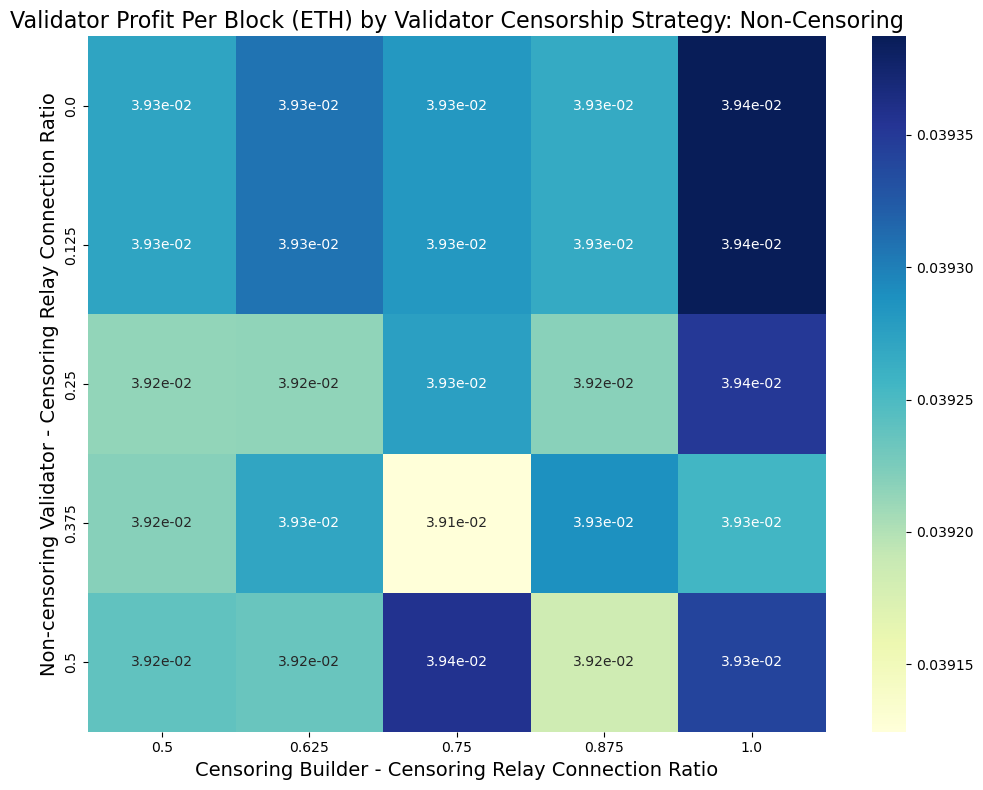

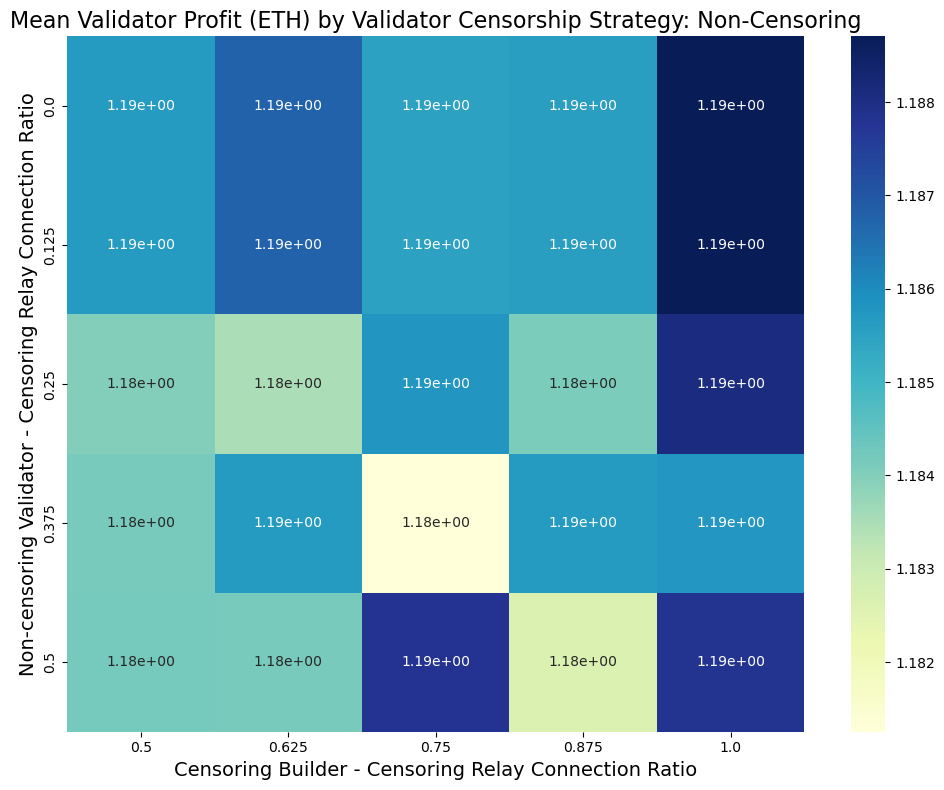

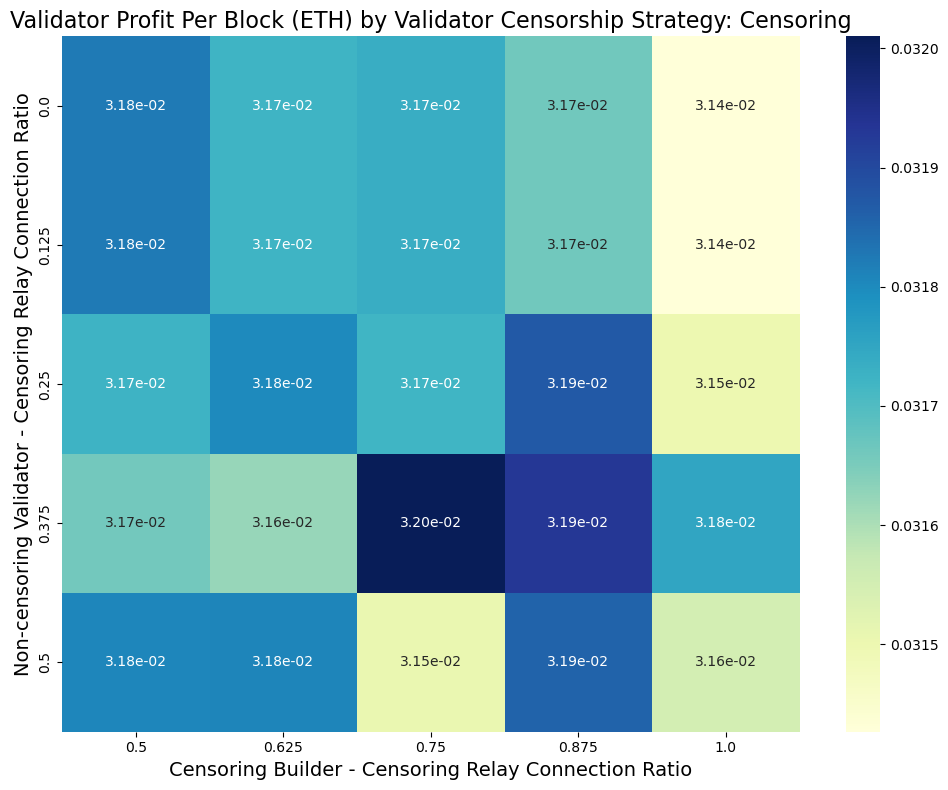

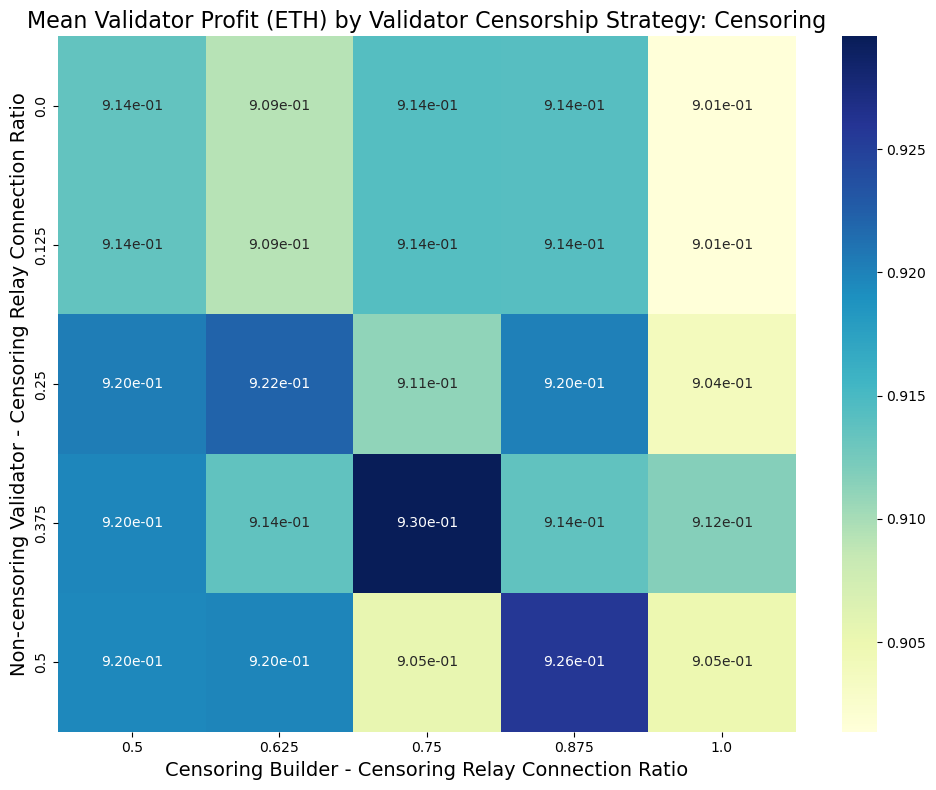

In [ ]:

base_dir = "simulation_results_SA_0608/sensitivity_censoring_br_vr_ratios_20250620_113554"


combined_transactions = pd.DataFrame()


folders = [f for f in os.listdir(base_dir) if f.startswith("censoring_br_vr_ratios_")]


def extract_br_vr_ratios(folder_name):
    match = re.search(r"censoring_br_vr_ratios_(\d+\.\d+)_(\d+\.\d+)_", folder_name)
    if match:
        br_ratio = float(match.group(1))
        vr_ratio = float(match.group(2))
        return (br_ratio, vr_ratio)
    else:
        return (float('inf'), float('inf'))

folders.sort(key=extract_br_vr_ratios)


results = []


for folder in folders:
    br_ratio, vr_ratio = extract_br_vr_ratios(folder)
    folder_path = os.path.join(base_dir, folder)
    file_path = os.path.join(folder_path, "blocks.csv")

    blocks = pd.read_csv(file_path, low_memory=False)


    blocks = blocks[(blocks['is_proposed']) & (blocks['builder_id'] != 'PROPOSER')].copy()


    experiment_label = f'cbrr_{br_ratio:.3f}_cvrr_{vr_ratio:.3f}'
    stats = calculate_validator_profit_by_policy(blocks, experiment_label)
    stats['br_ratio'] = br_ratio
    stats['vr_ratio'] = vr_ratio
    results.append(stats)


combined_stats = pd.concat(results, ignore_index=True)


print(combined_stats.sort_values(['br_ratio', 'vr_ratio', 'proposer_validator_is_censoring']))



def plot_validator_heatmap(df, is_censoring, value_col, title, fmt=".2e"):
    pivot_df = df[df['proposer_validator_is_censoring'] == is_censoring].pivot(
        index='vr_ratio', columns='br_ratio', values=value_col)

    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_df, annot=True, fmt=fmt, cmap="YlGnBu")
    plt.xlabel('Censoring Builder - Censoring Relay Connection Ratio', fontsize=14)
    plt.ylabel('Non-censoring Validator - Censoring Relay Connection Ratio', fontsize=14)
    plt.title(title, fontsize=16)
    # plt.gca().invert_yaxis()  
    plt.tight_layout()
    plt.show()


policies = combined_stats['proposer_validator_is_censoring'].unique()

for policy in policies:
    policy_label = 'Censoring' if policy else 'Non-Censoring'


    plot_validator_heatmap(
        combined_stats, policy, 'mean_validator_profit_per_block(ETH)',
        f'Validator Profit Per Block (ETH) by Validator Censorship Strategy: {policy_label}'
    )


    plot_validator_heatmap(
        combined_stats, policy, 'mean_validator_profit_per_validator(ETH)',
        f'Mean Validator Profit (ETH) by Validator Censorship Strategy: {policy_label}'
    )
